In [1]:
from sklearn.utils import check_random_state, check_X_y, shuffle
from sklearn.datasets import make_regression
from collections.abc import Callable
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

# Unidad IV Métodos de gradiente estocástico

### Galicia Pineda Enrique

**Instrucciones**. Resuelva cada uno de los siguientes problemas usando la técnica especificada.

Para cada uno de ellos se deberá:

- Correr los algoritmos cinco veces y reportar los resultados, resaltando en negrita el mejor y el peor.

- Graficar el mejor valor en cada iteración. Para los ejercicios 2 y 3 grafique, además, el valor promedio de la función objetivo de la población.

Considere los siguientes problemas de optimización:

a)

$$
\min\Biggl\{300 + \sum_{i=1}^{30}
\bigl(x_i^2 \;-\; 10\,\cos(2\pi\,x_i)\bigr)
\Biggr\}
\quad
\text{sujeto a}
\quad
-5.12 \;\le\; x_i \;\le\; 5.12,\; \forall\, i \in \{1,\dots,30\}.
\tag{1}
$$

b)

$$
\min\Biggl\{
-20 \exp\left(-\frac{2}{10}\sqrt{\tfrac{1}{10}\!\sum_{i=1}^{10} x_i^2}\right)
\;-\;
\exp\Bigl(\tfrac{1}{10}\!\sum_{i=1}^{10} \cos(2\pi\,x_i)\Bigr)
\;+\; 20 \;+\; e
\Biggr\}
$$

$$
\text{sujeto a}
\quad
-32.768 \;\le\; x_i \;\le\; 32.768,\; \forall\, i \in \{1,\dots,10\}.
\tag{2}
$$

c)

$$
\min\left\{
\sum_{i=1}^{10}\left(\sum_{j=1}^{10}
(10 + j^i)\,\left(\frac{x^{i}_{j}}{j^{i}}-1\right)\right)^{2}\right\}
,
$$

$$
\text{con la restricción}
\quad
-10 \;\le\; x_i \;\le\; 10,\; \forall\, i \in \{1,\dots,10\}.
\tag{3}
$$

---


En una primera parte, analizaremos cada una de las funciones para obtener su imagen, su comportamiento, encontrar el mínimo de manera analítica y con ello poder estudiar mejor el comportamiento de los algoritmos y las soluciones que arrojan en cada problema de la tarea.

La primera función se conoce como **Función de Rastrigin**:

$$
f(x) = 300 + \sum_{i=1}^{30}
\bigl(x_i^2 \;-\; 10\,\cos(2\pi\,x_i)\bigr)
$$


Lo primero a notar es que la función tiene como sumandos:

- $x_i^2$ y que la imagen de $x_i^2$ es $\mathbb{R^{+}}$, donde $x_i^2 = 0 \text{ si }x_i=0$ es mínimo de la función.

- $10\cos(2\pi x_i)$ es otro de los sumandos y la imagen de $10\cos(2\pi x_i)$ es $[-10, 10]$, con $10\cos(2\pi x_i) = 10 \text{ cuando }x_i=k,\;k\in\mathbb{Z}$

- El último sumando es la constante $300$.

Entonces se tiene que la imagen de
$$x_i^2 - 10\cos(2\pi x_i)$$

es $[-10,\infty)$ y que

$$x_i^2 - 10\cos(2\pi x_i) = -10$$

cuando $x_i=0$. La gráfica de esta función es la siguiente:

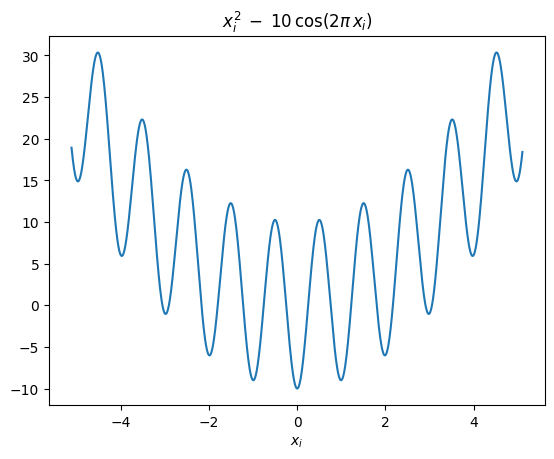

In [2]:
dummy_fun = lambda x : x ** 2 - 10 * np.cos(2 * np.pi * x)
x = np.arange(start=-5.12, stop=5.12, step=0.01)
plt.title(r"$x_i^2 \;-\; 10\,\cos(2\pi\,x_i)$")
plt.xlabel(r"$x_i$")
plt.plot(x, dummy_fun(x))

Si consideramos ahora la suma:

$$
\sum_{i=1}^{30}
\bigl(x_i^2 \;-\; 10\,\cos(2\pi\,x_i)\bigr)
$$

Considerando los comentarios anteriores, el valor mínimo que puede alcanzar $x_i^2 \;-\; 10\,\cos(2\pi\,x_i)$ es $-10$ y por ende el valor mínimo que puede alcanzar la suma

$$
\sum_{i=1}^{30}
\bigl(x_i^2 \;-\; 10\,\cos(2\pi\,x_i)\bigr)
$$

Es $-300$ cuando $x_1=\dots=x_{30}=0$

Finalmente considerando la constante:

$$
f(x) = 300 + \sum_{i=1}^{30}
\bigl(x_i^2 \;-\; 10\,\cos(2\pi\,x_i)\bigr)
$$

Podemos concluir que la función alcanza su mínimo cuando $x=(0,\dots,0)$ con valor en 0.

Podemos verificar eso, calculando el gradiente de la función, donde cada componente del vector gradiente está dada por
$$
\begin{align*}
\nabla f_{j} &= \partial_{x_{j}}\left[300 + \sum_{i=1}^{30}
\bigl(x_i^2 \;-\; 10\,\cos(2\pi\,x_i)\bigr)\right]\\
&=\sum_{i=1}^{30}\partial_{x_{j}}
x_i^2 \;-\; 10\partial_{x_{j}}\,\cos(2\pi\,x_i)\\
&=2\left(x_j \;+\; 10\pi\,\sin(2\pi\,x_j)\right),\quad j=1,\dots,30\\
\end{align*}
$$

Es decir, se reduce a calcular la derivada de la primera función analizada: $x_i^2 - 10\cos(2\pi x_i)$

Luego $\nabla f = 0 \text{ sii } \nabla f_{j} = 0 \text{ sii }2\left(x_j \;+\; 10\pi\,\sin(2\pi\,x_j)\right)~j=1,\dots,30$

Y
$$
\begin{align*}
&2\left(x_j \;+\; 10\pi\,\sin(2\pi\,x_j)\right) = 0\\
\implies & x_j \;+\; 10\pi\,\sin(2\pi\,x_j) = 0\\
\implies &x_j = -10\pi\,\sin(2\pi\,x_j)
\end{align*}
$$

Y en particular se satisface la igualdad cuando $x_j=0$

Si analizamos el resto de puntos donde se anula cada una de las componentes del gradiente, podemos apoyarnos de la gráfica para darnos cuenta que ocurre en las crestas y valles de la función, conforme oscila la función debido al coseno en el sumando, y no son mínimos de la función (podría ser alguno mínimo local si se cambiara el dominio de la función pero no es el caso para el rectángulo al que nos estamos restrigiendo en $-5.12 \;\le\; x_i \;\le\; 5.12,\; \forall\, i \in \{1,\dots,30\}.$)

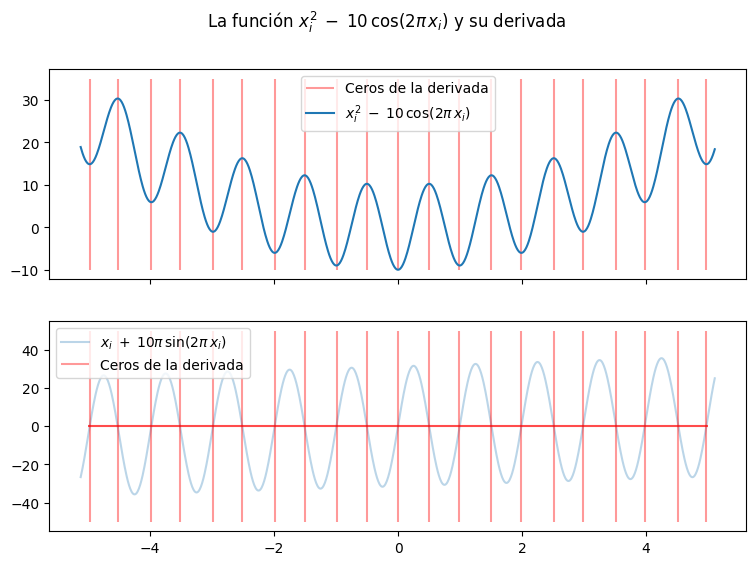

In [3]:
dummy_fun = lambda x : x ** 2 - 10 * np.cos(2 * np.pi * x)
dummy_deriv_fun = lambda x : x + 10 * np.pi * np.sin(2 * np.pi * x)
x = np.arange(start=-5.12, stop=5.12, step=0.01)

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9,6))
fig.suptitle(r"La función $x_i^2 \;-\; 10\,\cos(2\pi\,x_i)$ y su derivada")
ax[0].vlines([4.97, 4.5229, -4.5229, 3.9797, 3.51,2.98, 2.51, 1.98, 1.50, 0.99, 0.50, -4.97, 0, -3.9797,-3.51,-2.98,-2.51,-1.98,-1.50,-0.99,-0.50], -10, 35, label="Ceros de la derivada", color="red", alpha=0.4)
ax[0].plot(x, dummy_fun(x), label=r"$x_i^2 \;-\; 10\,\cos(2\pi\,x_i)$")
ax[0].legend()
ax[1].plot(x, dummy_deriv_fun(x), label=r"$x_i \;+\; 10\pi\,\sin(2\pi\,x_i)$", alpha=0.3)
ax[1].vlines([4.97, 4.5229, -4.5229, 3.9797, 3.51,2.98, 2.51, 1.98, 1.50, 0.99, 0.50, -4.97, 0, -3.9797,-3.51,-2.98,-2.51,-1.98,-1.50,-0.99,-0.50], -50, 50, label="Ceros de la derivada", color="red", alpha=0.4)
ax[1].hlines([0], -5, 5, color="red", alpha=0.7)
ax[1].legend()

De esta manera, concluimos que la función de Rastrigin

$$
f(x) = 300 + \sum_{i=1}^{30}
\bigl(x_i^2 \;-\; 10\,\cos(2\pi\,x_i)\bigr)
$$

está acotada inferiormente por 0, su mínimo es 0 y lo alcanza en el vector $x=0$, además tiene múltiples mínimos locales debido al comportamiento oscilatorio de la función coseno.

Además con las gráficas que hicimos, donde la función $x_i^2 \;-\; 10\,\cos(2\pi\,x_i)$ se graficó en el intervalo $[-5.15,~5.12]$ podemos apreciar que una cota superior _aproximada_ de la función $x_i^2 \;-\; 10\,\cos(2\pi\,x_i)$ es 30, por lo que una cota superior para la suma

$$
\sum_{i=1}^{30}
\bigl(x_i^2 \;-\; 10\,\cos(2\pi\,x_i)\bigr)
$$

es $30\times30=900$ por lo que finalmente podríamos concluir que la imagen de

$$
f(x) = 300 + \sum_{i=1}^{30}
\bigl(x_i^2 \;-\; 10\,\cos(2\pi\,x_i)\bigr)
$$

Está acotada en el intervalo $[0,1200]$ cuando $x$ se restringe a $-5.12 \;\le\; x_i \;\le\; 5.12,\; \forall\, i \in \{1,\dots,30\}$

La segunda función de la tarea se conoce como temos primero que de la **Función de Ackley**:

$$
f(x) = -20 \exp\left(-\frac{2}{10}\sqrt{\tfrac{1}{10}\!\sum_{i=1}^{10} x_i^2}\right)
\;-\;
\exp\Bigl(\tfrac{1}{10}\!\sum_{i=1}^{10} \cos(2\pi\,x_i)\Bigr)
\;+\; 20 \;+\; e
$$

Lo primero que debemos notar es que el argumento:
$$
\frac{2}{10}\sqrt{\tfrac{1}{10}\!\sum_{i=1}^{10} x_i^2} \geq 0~\forall x_{i}\in\mathbb{R}
$$

Y entonces la primer exponencial está acotada de la siguiente forma:
$$0<\exp\left(-\frac{2}{10}\sqrt{\tfrac{1}{10}\!\sum_{i=1}^{10} x_i^2}\right)\leq 1$$
y

$$-20\leq-20 \exp\left(-\frac{2}{10}\sqrt{\tfrac{1}{10}\!\sum_{i=1}^{10} x_i^2}\right)<0$$

Por otro lado, el segundo sumando en la función está acotado de la siguiente forma:

$$
\frac{1}{e}\leq\exp\Bigl(\tfrac{1}{10}\!\sum_{i=1}^{10} \cos(2\pi\,x_i)\Bigr)\leq e
$$

Pues

$$
\begin{align*}
&|\cos(2\pi\,x_i)|\leq 1\\
\implies& \Biggr|\sum_{i=1}^{10} \cos(2\pi\,x_i)\Biggl|\leq 10\\
\implies& \Biggr|\tfrac{1}{10}\!\sum_{i=1}^{10} \cos(2\pi\,x_i)\Biggl|\leq 1\\
\end{align*}
$$

Y esto último indica que el argumento de la segunda exponencial solo toma valores de -1 a 1 y por ende la exponencial toma valores entre $e^{-1}$ y $e^{1}$ (aprovechando la monotonía de la exponencial):

$$
\frac{1}{e}\leq\exp\Bigl(\tfrac{1}{10}\!\sum_{i=1}^{10} \cos(2\pi\,x_i)\Bigr)\leq e
$$

Así, ambos sumandos están acotados tanto superior como inferiormente. En particular cuando $x_1 = \dots = x_{10}=0$ entonces:

$$
-20 \exp\left(-\frac{2}{10}\sqrt{\tfrac{1}{10}\!\sum_{i=1}^{10} x_i^2}\right)
\;-\;
\exp\Bigl(\tfrac{1}{10}\!\sum_{i=1}^{10} \cos(2\pi\,x_i)\Bigr) = -20 - e
$$

Así, considerando el resto de sumandos constantes en la función de  Ackley, podemos concluir que

$$
f(x) = -20 \exp\left(-\frac{2}{10}\sqrt{\tfrac{1}{10}\!\sum_{i=1}^{10} x_i^2}\right)
\;-\;
\exp\Bigl(\tfrac{1}{10}\!\sum_{i=1}^{10} \cos(2\pi\,x_i)\Bigr)
\;+\; 20 \;+\; e
$$

La función está acotada inferiormente en 0, tiene su mínimo en $x=(0,\dots,0)$ y vale 0. Además la función también está acotada superiormente por $20 + e - 1/e$ siendo un valor asintótico para la función.

Esta función también presenta mínimos locales debido al coseno en la segunda exponencial y al comportamiento asintótico del primer sumando en la función, que poco a poco contribuye menos al valor que toma la función (tiende a 0 ese sumando)

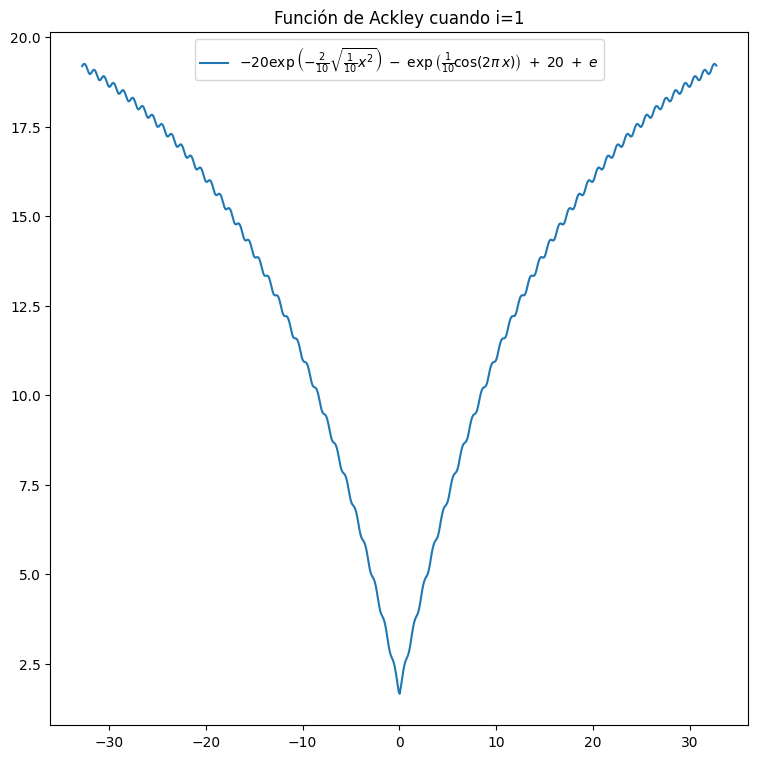

In [4]:
dummy_fun = lambda x : (
    -20 * np.exp(-(2 / 10) * np.sqrt((1 / 10) * (x ** 2)))
    - np.exp((1 / 10) * np.cos(2 * np.pi * x))
    + 20 + np.exp(1))

x = np.arange(start=-32.768, stop=32.768, step=0.1)
plt.figure(figsize=(9,9))
plt.plot(x, dummy_fun(x), label = r"$-20 \exp\left(-\frac{2}{10}\sqrt{\frac{1}{10}x^2}\right)\;-\;\exp\left(\frac{1}{10}\!\cos(2\pi\,x)\right)\;+\; 20 \;+\; e$")
plt.title("Función de Ackley cuando i=1")
plt.legend()

La tercera función de la tarea se conoce como **Función de Perm de parámetros D, Beta**:

$$
f(x) =
\sum_{i=1}^{10}\left(\sum_{j=1}^{10}
(10 + j^i)\,\left(\frac{x^{i}_{j}}{j^{i}}-1\right)\right)^{2},
$$

En esta función, primero notemos que la suma sobre $i$ es de términos mayores o iguales a cero, por el cuadrado en:

$$
\left(\sum_{j=1}^{10}
(10 + j^i)\,\left(\frac{x^{i}_{j}}{j^{i}}-1\right)\right)^{2}
$$

De esta forma podemos decir que **la imagen de la función de Perm** son los reales positivos, es decir $f(x)\geq 0~\forall x\in\mathbb{R}^{10}$.

Esto es útil para saber dónde y cuánto vale el mínimo de la función, pues $f(x)= 0$ si cada uno de los sumandos:

$$
\begin{align*}
&\left(\sum_{j=1}^{10}
(10 + j^i)\,\left(\frac{x^{i}_{j}}{j^{i}}-1\right)\right)^{2} = 0\\
\implies &\sum_{j=1}^{10}
(10 + j^i)\,\left(\frac{x^{i}_{j}}{j^{i}}-1\right) = 0
\end{align*}
$$

Luego, esta suma es cero, si

$$
\begin{align*}
&\frac{x^{i}_{j}}{j^{i}}-1 = 0\\
\implies &\frac{x^{i}_{j}}{j^{i}}= 1\\
\implies &x^{i}_{j}= j^{i}\\
\implies &x_{j}= j,~j=1,\dots,10
\end{align*}
$$


Es decir, cuando el vector $x=(1,2,\dots,10)$, entonces $f(x) = 0$ y como $f(x)$ está acotada inferiormente por $0$, podemos concluir que $f((1,2,\dots,10))$ es mínimo global de la función.

Un vez estudiadas cada una de las funciones, encontrando la imagen de la función y sus mínimos, procederemos a implementar los algoritmos solicitados en la tarea y discutir las soluciones encontradas en cada caso.

Primero codificaremos cada una de las funciones como funciones lambda y guardaremos en un diccionario los parámetros:

In [5]:
prob_1 = lambda x : 300 + (x ** 2 - 10 * np.cos(2 * np.pi * x)).sum()

prob_2 = lambda x : (
    -20 * np.exp(-(2 / 10) * np.sqrt((1 / 10) * (x ** 2).sum()))
    - np.exp((1 / 10) * np.cos(2 * np.pi * x).sum())
    + 20 + np.exp(1))

prob_3 = lambda x: sum(
    sum(
        (10 + (j + 1) ** (i + 1))
        * ((x[j] ** (i + 1)) / ((j + 1) ** (i + 1)) - 1)
        for j in range(10)) ** 2
    for i in range(10))

In [6]:
domains = {"rastrigin" : {"fun" :  prob_1,
                          "domain" : [-5.12, 5.12],
                          "dim" : 30},
           "ackley" : {"fun" :  prob_2,
                       "domain" : [-32.768, 32.768],
                       "dim" : 10},
           "perm" : {"fun" :  prob_3,
                     "domain" : [-10, 10],
                     "dim" : 10}}

1. Usando búsqueda aleatoria, encuentre la solución a estos problemas de optimización. Utilice 10,000 puntos en la búsqueda. *(25 puntos)*

La búsqueda aleatoria es una técnica de optimización que se caracteriza por su fácil implementación y que no requiere en un principio conocer características la función a optimizar, sin embargo nosotros hemos realizado el ejercicio analítico anterior para poder realizar un mejor análisis de los resultados.

La función `random_search` implementa el algoritmo de **búsqueda aleatoria** basándose en la generación de puntos aleatorios dentro del dominio definido y en la evaluación de la función objetivo en cada uno de esos puntos. Al final, retorna el punto que produce el valor mínimo de la función, junto con el valor de la función.

Además de buscar el punto óptimo, la función genera un gráfico que muestra los valores evaluados de la función en cada uno de los puntos muestreados.

In [7]:
def random_search(fun : Callable,
                  dim : int = 2,
                  lower_bound :  float = 0.0,
                  upper_bound :  float = 1.0,
                  trials :  int = 10_000,
                  random_state = None):
    """
    Realiza una búsqueda aleatoria para minimizar una función objetivo.

    Esta función genera puntos aleatorios dentro de los límites especificados,
    evalúa la función objetivo en cada punto y retorna aquel punto que produce
    el menor valor. Además, muestra un gráfico de los valores de la función evaluados.

    Parameters
    ----------
    fun : callable
        Función objetivo a minimizar. Debe aceptar como entrada un array de NumPy
        de forma (dim,).
    dim : int, optional
        Dimensión del espacio de búsqueda. Por defecto es 2.
    lower_bound : float, optional
        Límite inferior para cada dimensión. Por defecto es 0.
    upper_bound : float, optional
        Límite superior para cada dimensión. Por defecto es 1.
    trials : int, optional
        Número de puntos aleatorios a muestrear. Por defecto es 10000.
    random_state : int, RandomState instance or None, optional
        Semilla o generador de números aleatorios para reproducibilidad. Por defecto es None.

    Returns
    -------
    best_point : ndarray
        Punto del espacio de búsqueda que minimiza la función objetivo.
    best_value : float
        Valor mínimo de la función objetivo encontrado.
    """
    # Inicializa el estado aleatorio
    rng = check_random_state(random_state)

    # Genera puntos aleatorios distribuidos uniformemente dentro de los límites
    points = rng.uniform(low=lower_bound, high=upper_bound, size=(trials, dim))

    # Evalúa la función objetivo en todos los puntos
    f_values = [fun(point) for point in points]

    # Encuentra el índice del valor mínimo
    best_index = np.argmin(f_values)

    # Grafica los valores de la función evaluados
    plt.plot(f_values, 'ro')
    plt.plot(best_index, f_values[best_index], 'bo')
    plt.ylabel('f(x)')
    plt.show()

    return points[best_index], f_values[best_index]


Comenzando con la función de Rastrigin, recordemos que esta función tiene una imagen en $[0,\infty)$ y su mínimo está en $x=(0,\dots,0)$:

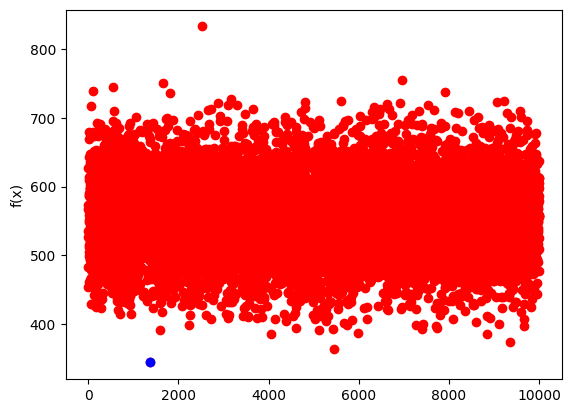

El valor en la función objetivo es 343.7734297792311


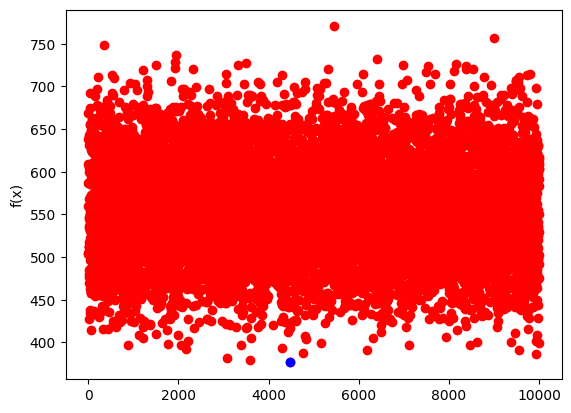

El valor en la función objetivo es 376.4359086614854


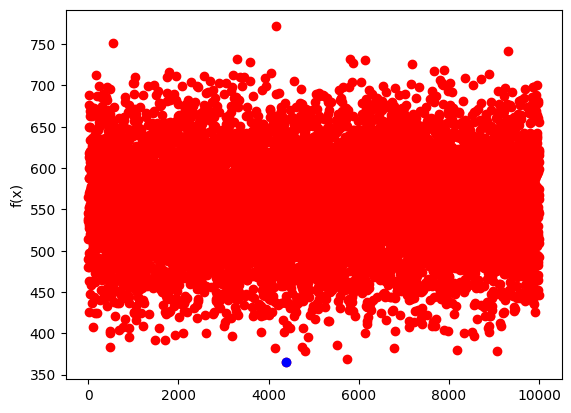

El valor en la función objetivo es 364.65984768115845


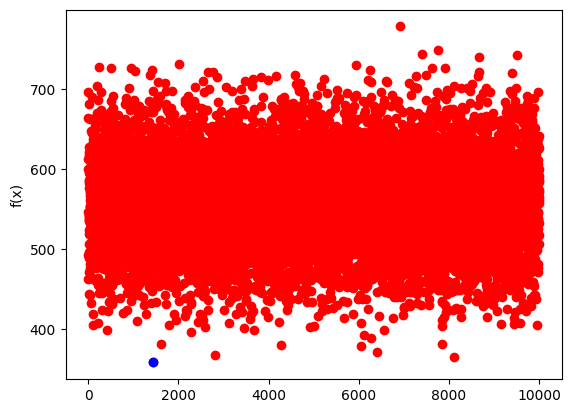

El valor en la función objetivo es 357.82251533519485


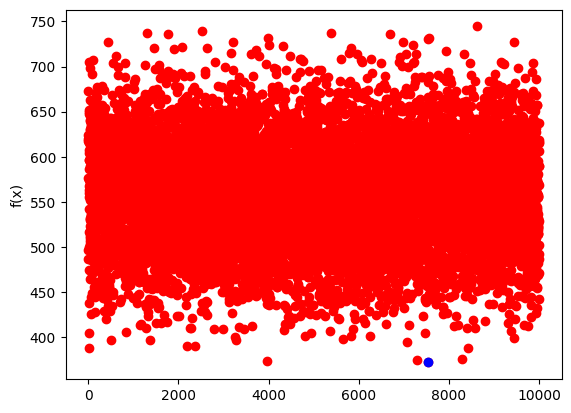

El valor en la función objetivo es 372.0035191192412


In [8]:
eval_x = []
eval_f = []
current_problem = domains["rastrigin"]
for trial in range(5):
  x, f = random_search(fun=current_problem["fun"],
                       dim=current_problem["dim"],
                       lower_bound=current_problem["domain"][0],
                       upper_bound=current_problem["domain"][1],
                       random_state=trial)
  eval_x.append(x)
  eval_f.append(f)
  print(f"El valor en la función objetivo es {f}")

Hemos corrido el algoritmo 5 veces y graficado los valores de $f$ en las muestras de 10 000 puntos, en azul se muestra el mejor valor (el más pequeño) encontrado en cada una de las muestras. En los 5 casos el mejor valor siempre estuvo en un rango entre (300, 400) y por las gráficas hechas podemos ver que los puntos de la función de Rastrigin en cada una de las muestras estuvieron en un rango entre 300 y 800, lo cual es consistente con el intervalo calculado de $[0,1200]$.

In [9]:
# pequeña clase para poner en negritas y otros colores el resultado de print()
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

min_value = np.min(eval_f)
max_value = np.max(eval_f)

print("Valores minimos encontrados utilizando Búsqueda Aleatorioa (5 ejecuciones):")
for eval in eval_f:
  if eval == min_value:
    eval = color.BOLD + color.GREEN + str(float(eval)) + color.END
  elif eval == max_value:
    eval = color.BOLD + color.RED + str(float(eval)) + color.END
  else:
    eval = str(float(eval))
  print(eval)

Valores minimos encontrados utilizando Búsqueda Aleatorioa (5 ejecuciones):
343.7734297792311
376.4359086614854
364.65984768115845
357.82251533519485
372.0035191192412


De estas cinco ejecuciones del algoritmo de búsqueda aleatoria, el mejor valor arrojado por el algoritmo (el valor más pequeño) encontrado fue de $343.77$ mientras que el peor valor arrojado por el algoritmo fue de 376.43.

Si ahora consultamos el vector asociado a estos valores de la función de Rastrigin:

In [10]:
print("Vector asociado al mejor resultado obtenido por búsqueda aleatoria para minimizar la función de Rastrigin:")
print(eval_x[np.argmin(eval_f)], "\n")
print("Norma del vector asociado al mejor resultado obtenido por búsqueda aleatoria para minimizar la función de Rastrigin:")
print(np.linalg.norm(eval_x[np.argmin(eval_f)]), "\n")
print("Vector asociado al peor resultado obtenido por búsqueda aleatoria para minimizar la función de Rastrigin:")
print(eval_x[np.argmax(eval_f)], "\n")
print("Norma del vector asociado al peor resultado obtenido por búsqueda aleatoria para minimizar la función de Rastrigin:")
print(np.linalg.norm(eval_x[np.argmax(eval_f)]))

Vector asociado al mejor resultado obtenido por búsqueda aleatoria para minimizar la función de Rastrigin:
[ 3.66964643 -1.05445346 -2.01269789 -0.25175712  0.82503952  4.0062781
 -1.9055592   1.50470418 -0.08107622  2.80982975 -0.98130948  2.34355328
 -2.34362098  1.70344254  1.48605512  0.92209005  0.04273635  1.42694612
  0.04195434 -3.07420801 -1.36127943 -4.08374971  1.39257548  0.98266526
 -0.68226813  0.11160995  0.4791052   0.49003387 -1.00824942 -0.13608372] 

Norma del vector asociado al mejor resultado obtenido por búsqueda aleatoria para minimizar la función de Rastrigin:
10.101325836477852 

Vector asociado al peor resultado obtenido por búsqueda aleatoria para minimizar la función de Rastrigin:
[-0.34278616  4.22541082 -2.05917947  4.55397705 -3.7473785  -3.03212904
  0.1273851   1.84673291  3.95550884 -0.20170198  0.87889726  1.79276489
  5.09839784 -1.81952255 -1.0418029  -0.756995    4.1691908   4.07447803
 -0.58429846 -1.04868859  2.05876867  3.01751841 -0.96544638  2

En ambos casos podemos ver que los valores de las coordenadas de los vectores no están _tan lejanos_ del vector $(0,\dots, 0)$, incluso hay algunas coordenadas donde sus valores ya están entre -1 y 1.

Esto también puede confirmarse si calculamos las normas de los vectores y vemos que son pequeñas, la norma del vector asociado a la mejor solución encontrada es de 10 y la norma del vector asociacio a la peor solución encontrada es de 14, estando _relativamente_ cerca entre sí.

No obstante es importante darse cuenta que aunque estos vectores ya están muy cercanos al vector que da el valor mínimo de la función $(0,\dots,0)$, el valor de la función de Rastrigin sigue siendo muy grande (del orden de 300). Es necesario preguntarse en los problemas de optimización qué margen de error es aceptable o incluso proponer iteraciones del algoritmo de búsqueda aleatoria donde comencemos a reducir más y más el espacio de búsqueda, por ejemplo en vez de $-5.12 \;\le\; x_i \;\le\; 5.12,\; \forall\, i \in \{1,\dots,30\}$ reducirlo a $-1 \;\le\; x_i \;\le\; 1,\; \forall\, i \in \{1,\dots,30\}$

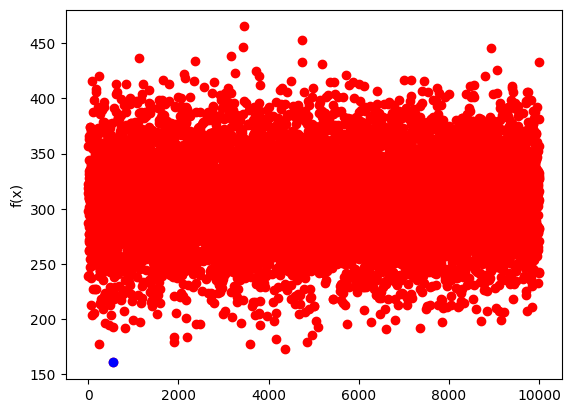

El valor en la función objetivo es 160.7519634326902


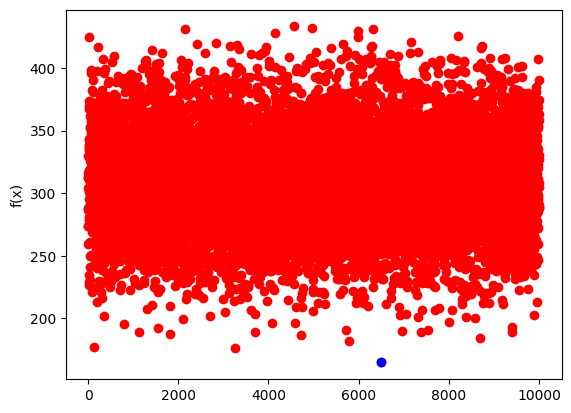

El valor en la función objetivo es 164.72937539211958


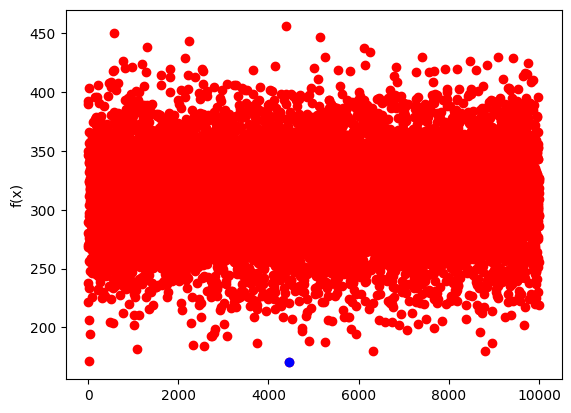

El valor en la función objetivo es 170.08653787576532


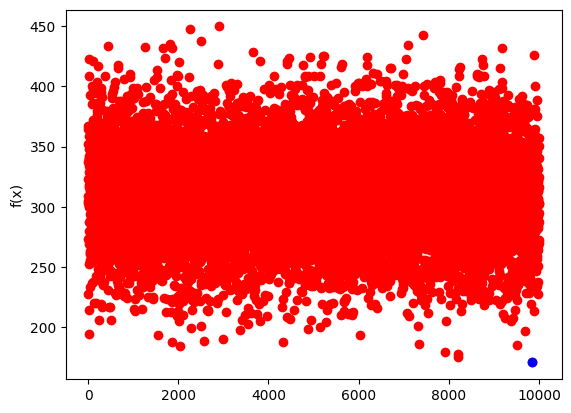

El valor en la función objetivo es 170.95160250835482


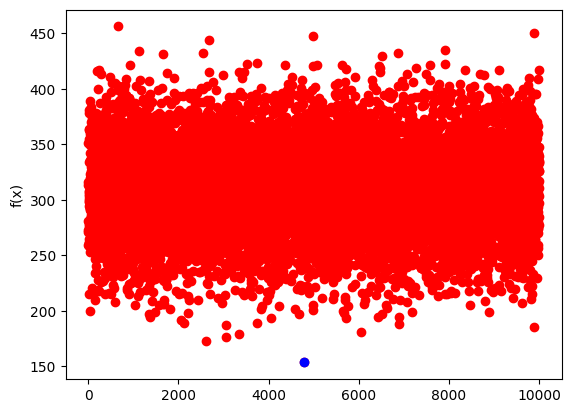

El valor en la función objetivo es 153.47735795908275


In [11]:
eval_x = []
eval_f = []
current_problem = domains["rastrigin"]
for trial in range(5):
  x, f = random_search(fun=current_problem["fun"],
                       dim=current_problem["dim"],
                       lower_bound=-1,
                       upper_bound=1,
                       random_state=trial)
  eval_x.append(x)
  eval_f.append(f)
  print(f"El valor en la función objetivo es {f}")

De esta propuesta de reducir el espacio de búsqueda a -1, 1 en cada coordenada encontramos que los resultados del algoritmo de búsqueda aleatoria son:

In [12]:
min_value = np.min(eval_f)
max_value = np.max(eval_f)

print("Valores minimos encontrados utilizando Búsqueda Aleatorioa (5 ejecuciones):")
for eval in eval_f:
  if eval == min_value:
    eval = color.BOLD + color.GREEN + str(float(eval)) + color.END
  elif eval == max_value:
    eval = color.BOLD + color.RED + str(float(eval)) + color.END
  else:
    eval = str(float(eval))
  print(eval)

Valores minimos encontrados utilizando Búsqueda Aleatorioa (5 ejecuciones):
160.7519634326902
164.72937539211958
170.08653787576532
170.95160250835482
153.47735795908275


En los cinco casos encontramos una mejora en el valor que arroja el algoritmo de búsqueda aleatoria pues en lugar de ser del orden de 300 es del orden de ~150, siendo el mejor valor encontrado el de 153.47. Este valor sigue estando alejado del mínimo global de la función que es 0, a pesar de haber reducido significativamente el espacio de búsqueda.

Esto refleja la debilidad del algoritmo de búsqueda aleatoria, donde podríamos necesitar muchas más iteraciones y reducir mucho más el espacio de búsqueda para encontrar mejores resultados.

Continuando con la función de Ackley:

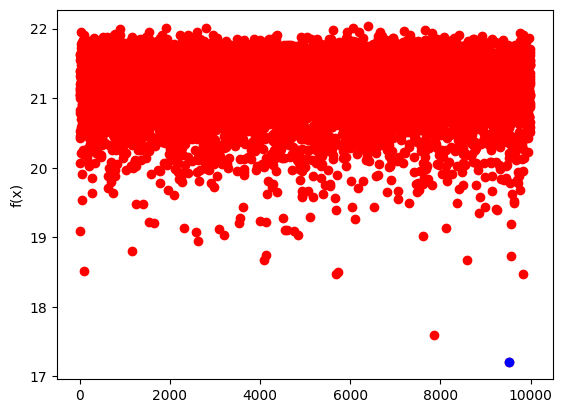

El valor en la función objetivo es 17.200431348252465


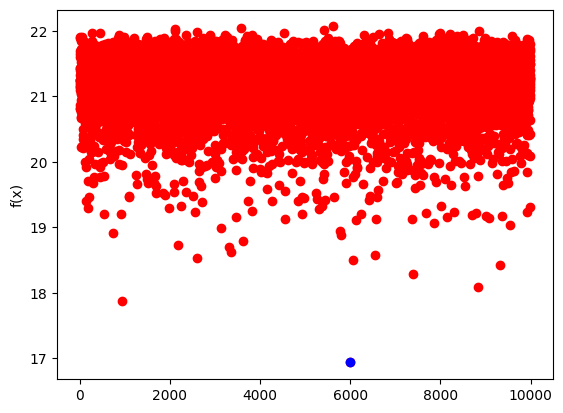

El valor en la función objetivo es 16.935364554343796


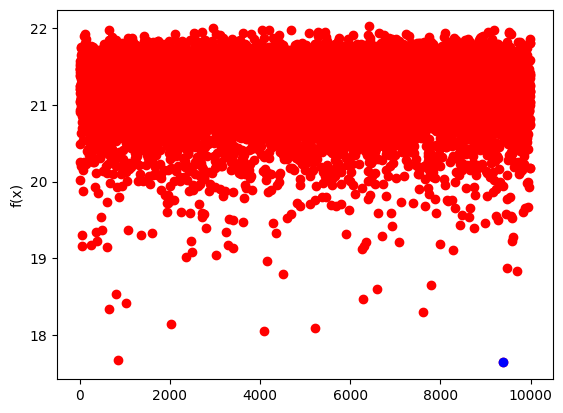

El valor en la función objetivo es 17.646700070040065


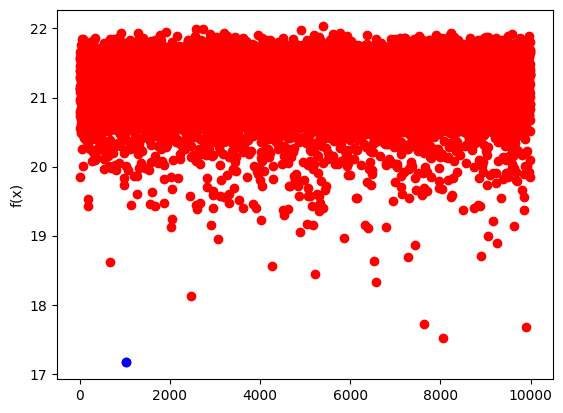

El valor en la función objetivo es 17.163083550147903


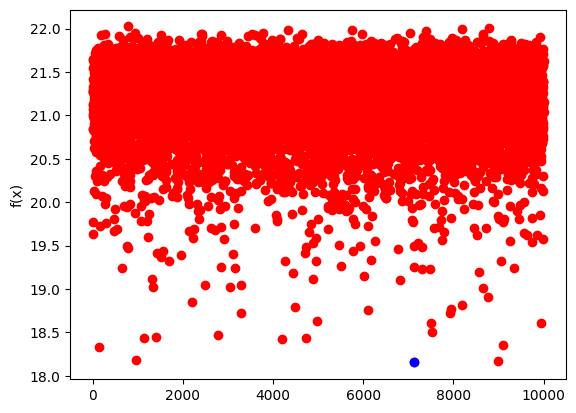

El valor en la función objetivo es 18.154523351788438


In [13]:
eval_x = []
eval_f = []
current_problem = domains["ackley"]
for trial in range(5):
  x, f = random_search(fun=current_problem["fun"],
                       dim=current_problem["dim"],
                       lower_bound=current_problem["domain"][0],
                       upper_bound=current_problem["domain"][1],
                       random_state=trial)
  eval_x.append(x)
  eval_f.append(f)
  print(f"El valor en la función objetivo es {f}")

Hemos hecho el mismo ejercicio de correr el algoritmo 5 veces y graficar los valores de $f$ en las muestras de 10 000 puntos, mostrándose el mejor valor (el más pequeño) encontrado en cada una de las muestras.

En este caso se muestra de forma clara el comportamiento asintótico de la función de Ackley, pues los puntos no superan el valor de $20+e-1/e \approx 22.3$ y todos los puntos en cada una de las muestras deben caer en este intervalo de $[0, ~20+e-1/e)$

Analicemos los mínimos encontrados por el algoritmo de búsqueda aleatoria:

In [14]:
min_value = np.min(eval_f)
max_value = np.max(eval_f)

print("Valores minimos encontrados utilizando Búsqueda Aleatorioa (5 ejecuciones):")
for eval in eval_f:
  if eval == min_value:
    eval = color.BOLD + color.GREEN + str(float(eval)) + color.END
  elif eval == max_value:
    eval = color.BOLD + color.RED + str(float(eval)) + color.END
  else:
    eval = str(float(eval))
  print(eval)

Valores minimos encontrados utilizando Búsqueda Aleatorioa (5 ejecuciones):
17.200431348252465
16.935364554343796
17.646700070040065
17.163083550147903
18.154523351788438


El primer comentario a hacer es que aunque estos números parezcan _pequeños y cercanos a cero_, debemos recordar que la imagen de la función está en $[0, ~22.3)$ por lo que en realidad estos resultados de la búsqueda aleatoria son malos, pues incluso están mas cerca del lado derecho del intervalo que del mínimo (es decir están mas cerca de 22 que de 0)

El **mejor resultado obtenido de las cinco ejecuciones del algoritmo es 16.93** mientras que el **peor resultado es de 18.15.** Estos resultados dejan en evidencia que muchas veces es necesario conocer un poco sobre la función o al menos realizar un pequeño análisis o podríamos confiar de manera equivocada.

Podemos finalizar presentando los vectores $x$ y sus normas encontrados:

In [15]:
print("Vector asociado al mejor resultado obtenido por búsqueda aleatoria para minimizar la función de Ackley:")
print(eval_x[np.argmin(eval_f)], "\n")
print("Norma del vector asociado al mejor resultado obtenido por búsqueda aleatoria para minimizar la función de Ackley:")
print(np.linalg.norm(eval_x[np.argmin(eval_f)]), "\n")
print("Vector asociado al peor resultado obtenido por búsqueda aleatoria para minimizar la función de Ackley:")
print(eval_x[np.argmax(eval_f)], "\n")
print("Norma del vector asociado al peor resultado obtenido por búsqueda aleatoria para minimizar la función de Ackley:")
print(np.linalg.norm(eval_x[np.argmax(eval_f)]))

Vector asociado al mejor resultado obtenido por búsqueda aleatoria para minimizar la función de Ackley:
[  4.09577611 -12.61690834  10.02496629   4.59152101  -4.69117327
  -1.28762472  -1.12176431  -3.60089287 -12.02669579   5.66553822] 

Norma del vector asociado al mejor resultado obtenido por búsqueda aleatoria para minimizar la función de Ackley:
22.63124777471105 

Vector asociado al peor resultado obtenido por búsqueda aleatoria para minimizar la función de Ackley:
[  2.00248186   5.03143351 -18.70747714  15.91130964   4.98980687
   2.64020364  -7.10952439  -5.56065217  -6.84651774 -10.01909948] 

Norma del vector asociado al peor resultado obtenido por búsqueda aleatoria para minimizar la función de Ackley:
29.884058111402183


Estos vectores y el valor de sus normas también son un indicador de los lejanos que estamos con respecto al mínimo de la función pues sus normas son muy grandes y cada una de sus coordenadas están alejadas del vector $(0,\dots,0)$ que minimiza la función.

Aplicando el algoritmo de búsqueda aleatoria ahora a la función Perm:

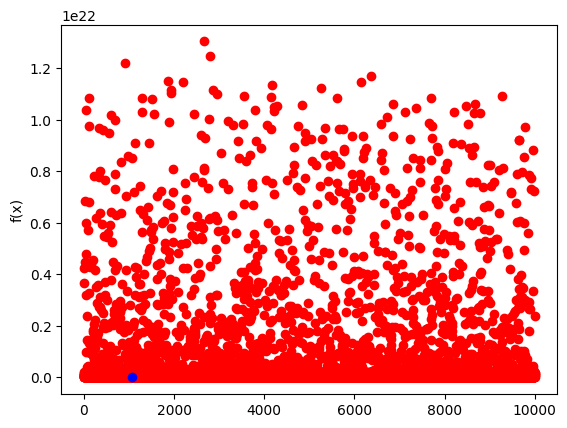

El valor en la función objetivo es 1293619037494070.2


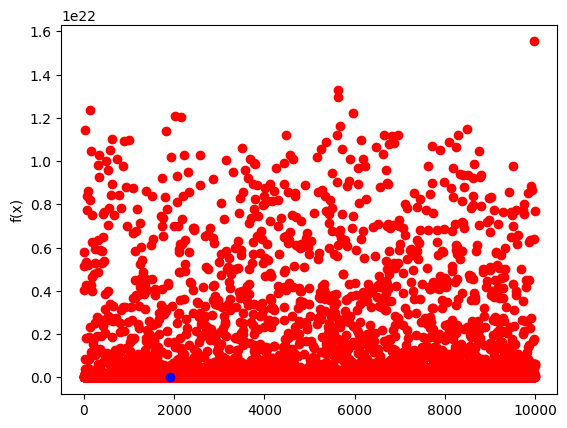

El valor en la función objetivo es 3207991472451349.0


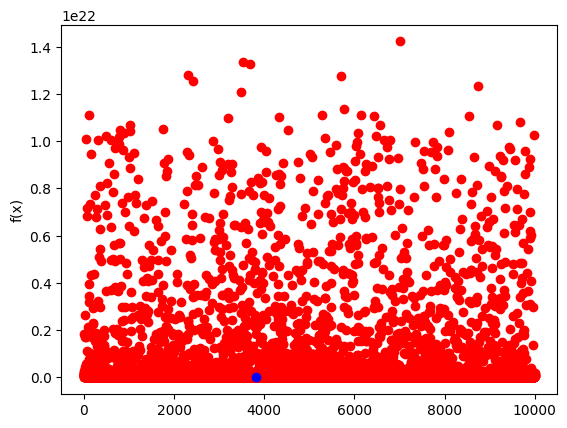

El valor en la función objetivo es 9674567515208532.0


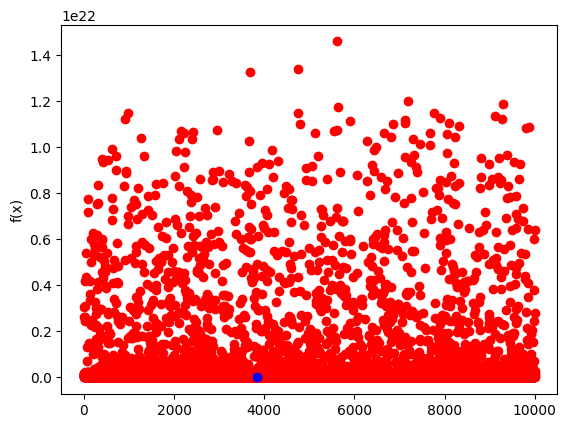

El valor en la función objetivo es 4872086991101184.0


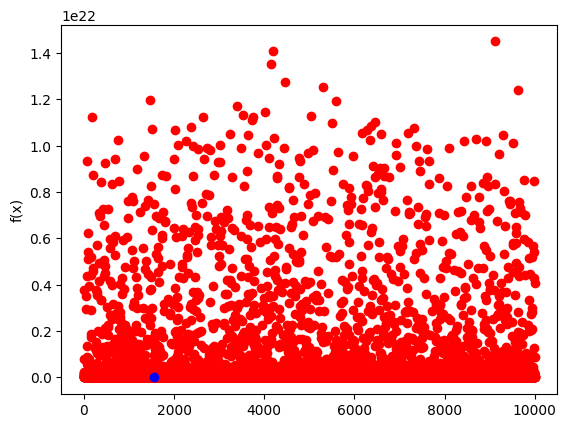

El valor en la función objetivo es 3911287614115318.5


In [16]:
eval_x = []
eval_f = []
current_problem = domains["perm"]
for trial in range(5):
  x, f = random_search(fun=current_problem["fun"],
                       dim=current_problem["dim"],
                       lower_bound=current_problem["domain"][0],
                       upper_bound=current_problem["domain"][1],
                       random_state=trial)
  eval_x.append(x)
  eval_f.append(f)
  print(f"El valor en la función objetivo es {f}")

De manera análoga, ejecutamos el algoritmo 5 veces y graficamos los valores de $f$ en las muestras de 10 000 puntos, mostrándose el mejor valor (el más pequeño) encontrado en cada una de las muestras.

En esta función en particular encontramos valores para $f$ muy grandes, del orden de $10^{22}$ como se aprecia en cada una de las gráficas. Como habíamos calculado anteriormente, la función Perm está acotada inferiormente por 0 y su mínimo global es 0.

Con esto en mente, analicemos los mínimos encontrados por el algoritmo de búsqueda aleatoria:

In [17]:
min_value = np.min(eval_f)
max_value = np.max(eval_f)

print("Valores minimos encontrados utilizando Búsqueda Aleatorioa (5 ejecuciones):")
for eval in eval_f:
  if eval == min_value:
    eval = color.BOLD + color.GREEN + str(float(eval)) + color.END
  elif eval == max_value:
    eval = color.BOLD + color.RED + str(float(eval)) + color.END
  else:
    eval = str(float(eval))
  print(eval)

Valores minimos encontrados utilizando Búsqueda Aleatorioa (5 ejecuciones):
1293619037494070.2
3207991472451349.0
9674567515208532.0
4872086991101184.0
3911287614115318.5


En este caso, dado el rango tan grande de valores que toma la función (de hasta $10^{22}$), los mínimos encontrados por el algoritmo de búsqueda aleatoria también son _relativamente grandes_ del orden de $10^{15}$, pero ya contextualizados al rango de valores que puede tomar la función, son 7 órdenes de magnitud más pequeños que la escala que estamos utilizando para graficar todos estos puntos ($10^{22}$) por lo que podríamos llamarlos "buenos" candidatos a pesar de ser valores en extremo alejados de 0, el mínimo de la función.

El **mejor valor encontrado es de 1293619037494070.2** mientras que el **peor valor encontrado es de 9674567515208532.0** en cinco iteraciones.

Si analizamos ahora los vectores asociados a estos valores de la función:

In [18]:
print("Vector asociado al mejor resultado obtenido por búsqueda aleatoria para minimizar la función de Perm:")
print(eval_x[np.argmin(eval_f)], "\n")
print("Norma del vector asociado al mejor resultado obtenido por búsqueda aleatoria para minimizar la función de Perm:")
print(np.linalg.norm(eval_x[np.argmin(eval_f)]), "\n")
print("Vector asociado al peor resultado obtenido por búsqueda aleatoria para minimizar la función de Perm:")
print(eval_x[np.argmax(eval_f)], "\n")
print("Norma del vector asociado al peor resultado obtenido por búsqueda aleatoria para minimizar la función de Perm:")
print(np.linalg.norm(eval_x[np.argmax(eval_f)]))

Vector asociado al mejor resultado obtenido por búsqueda aleatoria para minimizar la función de Perm:
[-4.00189286 -0.68092475 -4.15947105  9.74029259  9.49072125  2.35070411
  8.13120235 -3.74128068  5.75785786  5.30105063] 

Norma del vector asociado al mejor resultado obtenido por búsqueda aleatoria para minimizar la función de Perm:
19.12120815705308 

Vector asociado al peor resultado obtenido por búsqueda aleatoria para minimizar la función de Perm:
[-2.84671018  2.01304103  4.55778708  9.2479475   6.01540957  6.39106048
  3.74193161  9.52706568  9.10205349  1.85297537] 

Norma del vector asociado al peor resultado obtenido por búsqueda aleatoria para minimizar la función de Perm:
19.660437013919818


In [19]:
print("Vector solución para minimizar la función de Perm (encontrado analíticamente):")
print(np.arange(1, 11, 1), "\n")
print("Norma del vector solución para minimizar la función de Perm (encontrado analíticamente):")
print(np.linalg.norm(np.arange(1, 11, 1)))

Vector solución para minimizar la función de Perm (encontrado analíticamente):
[ 1  2  3  4  5  6  7  8  9 10] 

Norma del vector solución para minimizar la función de Perm (encontrado analíticamente):
19.621416870348583


En este caso podemos ver cómo las normas de los vectores de la mejor y peor solución ya están muy cercanos a la norma del vector solución, pero las coordenadas de los vectores solución encontrados por búsqueda aleatoria todavía están muy lejanas del vector solución $(1, 2, 3,\dots,10)$ esto también lo podemos notar si calculamos la similaridad coseno entre los vectores resultado del algoritmo y nuestro vector solución:

$$
\text{Similaridad} = (A\cdot B) / (||A||\cdot||B||)
$$

In [20]:
print("Similaridad coseno entre el vector solución y la mejor solución encontrada por búsqueda aleatoria")
print(np.dot(eval_x[np.argmin(eval_f)], np.arange(1, 11, 1)) / (np.linalg.norm(eval_x[np.argmin(eval_f)]) * np.linalg.norm(np.arange(1, 11, 1))))
print("Similaridad coseno entre el vector solución y la peor solución encontrada por búsqueda aleatoria")
print(np.dot(eval_x[np.argmax(eval_f)], np.arange(1, 11, 1)) / (np.linalg.norm(eval_x[np.argmax(eval_f)]) * np.linalg.norm(np.arange(1, 11, 1))))

Similaridad coseno entre el vector solución y la mejor solución encontrada por búsqueda aleatoria
0.5717076418594204
Similaridad coseno entre el vector solución y la peor solución encontrada por búsqueda aleatoria
0.8376231320698024


Donde podemos comprobar cómo los vectores por similaridad coseno todavía no están tan cercanos, lo que indica que coordenada a coordenada, no están _alineados_ es decir, difieren en sus valores.

En conclusión, para el algoritmo de búsqueda aleatoria, es recomendable tener algún conocimiento previo sobre la función a optimizar o el problema, para intentar reducir el espacio de soluciones y facilitar el trabajo del algoritmo, también es útil para decidir si será necesario tomar muestras más grande so pequeñas y también para saber cuántas iteraciones o llamadas al algoritmo serán necesarias hasta encontrar una solución que consideremos aceptable. Si tenemos alguna tolerancia o algun conocimiento previo de la solución, quizás podríamos establecer un criterio de parada y dejar que el algoritmo de búsqueda aleatoria se ejecute cuantas veces sea necesario hasta encontrar una solución que satisfaga nuestros requerimientos. No obstante, esto puede ser muy lento, requerir demasiado cómputo (por tantas iteraciones) y puede ser un esfuerzo inútil, pues no hay garantia de la rapidez o cumplimiento de los criterios de parada que establezcamos, por lo que quizás en un escenario así, quizás sea preferible recurrir a otro algoritmo de optimización.

2. Resuelva los problemas de optimización del ejercicio 1, usando evolución diferencial (DE/- Rand/1/bin) con un tamaño de población de 100, durante 100 iteraciones y los parámetros F = 0.5 y CR = 0.5 _(25 puntos)_

Con el algoritmo de Evolución Diferencial buscaremos ahora los mínimos de las funciones de Ackley, Perm y Rastrigin. Ahora buscaremos soluciones candidatas en una población que estará evolucionando generación a generación. En un principio esperamos un mucho mejor desempeño al encontrado con el algoritmo de búsqueda aleatoria, donde buscamos en las 100 iteraciones a emplear una convergencia hacia el mínimo de cada una de las funciones como las hemos estado utilizando.

El siguiente código de la función `differential_evolution` trabaja con un tamaño de la población, tasa de cruza (CR), peso diferencial (F), y el número máximo de iteraciones (max_iters) para encontrar las soluciones al problema de optimización, en este caso, encontrar el mínimo de nuestras funciones en el dominio especificado.

Inicializamos dos listas, history_best y history_mean, que almacenarán el mejor ajuste y el ajuste promedio de la población en cada iteración como se pide en la tarea.

La población inicial se genera con valores aleatorios entre [0, 1] y cada individuo se evalúa aplicando la función objetivo, es importante aclarar que los individuos se transforman para respetar los dominios de la función (y no quedarnos entre 0 y 1) y poder calcular el valor de la función en cada uno de ellos.

Posteriormente, ya para la evolución diferencial, debemos seleccionar tres individuos de forma aleatoria y realizar la mutación con el peso diferencial `F` proporcionado.

Luego se realiza una cruza binaria para combinar la información y para el resto de variables comparar con la tasa de cruza.

Finalmente, se evalúa el ajuste de la descendencia y se actualiza la población original, reemplazando aquellos individuos cuyos nuevos valores tienen un mejor ajuste.

In [21]:
def differential_evolution(fun, n_dim, lower_bound=0, upper_bound=1,
                           population_size=100, CR=0.5, F=0.5,
                           max_iters=100, random_state=None):
    """
    Evolución diferencial.

    Parameters
    ----------
    fun : callable
        Función objetivo a optimizar.
    n_dim : int
        Número de variables del problema de optimización.
    lower_bound : int or array-like, optional
        Límite inferior de las variables.
    upper_bound : int or array-like, optional
        Límite superior de las variables.
    population_size : int, optional
        Número de individuos en la población.
    CR : float, optional
        Tasa de cruza.
    F : float, optional
        Peso diferencial.
    max_iters : int, optional
        Número máximo de iteraciones / generaciones.
    random_state : int or RandomState, optional
        Semilla o estado para los números aleatorios.

    Returns
    -------
    tuple
        Una tupla que contiene:
          - final_population : array-like
              Población final transformada al dominio original.
          - fit : array-like
              Fitness de cada individuo en la población final.
          - history_best : list
              Historial del mejor fitness por iteración.
          - history_mean : list
              Historial del fitness medio por iteración.
    """
    random_state = check_random_state(random_state)
    history_best = []
    history_mean = []

    # Crear la población inicial en el intervalo [0, 1]
    population = random_state.uniform(size=(population_size, n_dim))
    scale = np.subtract(upper_bound, lower_bound)

    # Evaluar la aptitud de cada individuo en la población
    fit = [fun(scale * ind + lower_bound) for ind in population]
    history_best.append(np.min(fit))
    history_mean.append(np.mean(fit))

    for _ in range(max_iters):
        # Selección aleatoria de tres individuos para la mutación direccional
        r1, r2, r3 = np.argsort(
            random_state.uniform(size=(population_size, population_size))
        ).T[:3]

        # Crear el vector de prueba usando la mutación direccional
        trial = np.clip(population[r1] + F * (population[r2] - population[r3]),
                        0, 1)

        # Cruza binomial: definir los puntos de cruza
        cross_points = random_state.uniform(size=(population_size, n_dim)) < CR
        is_any_true = np.all(~cross_points, axis=1)
        if np.any(is_any_true):
            cross_points[is_any_true,
                         random_state.randint(n_dim,
                                              size=is_any_true.sum())] = True

        offspring = population.copy()
        offspring[cross_points] = trial[cross_points]

        # Evaluar el fitness de la población descendiente
        fit_offspring = [fun(scale * ind + lower_bound) for ind in offspring]

        # Seleccionar los individuos para la siguiente generación
        is_better = np.where(np.array(fit_offspring) < np.array(fit), True, False)
        if np.any(is_better):
            population[is_better] = offspring[is_better]
            fit = np.where(is_better, fit_offspring, fit)

        history_best.append(np.min(fit))
        history_mean.append(np.mean(fit))

    # Graficar el historial de la mejor solución por iteración
    plt.plot(history_best, 'ro')
    plt.ylabel('f(x)')
    plt.xlabel('Iterations')
    plt.title('Best solution per iteration')
    plt.show()

    # Graficar el historial del fitness medio por iteración
    plt.plot(history_mean, 'ro')
    plt.ylabel('f(x)')
    plt.xlabel('Iterations')
    plt.title('Mean solution per iteration')
    plt.show()

    # Transformar la población final al dominio original
    final_population = scale * population + lower_bound
    return final_population, fit, history_best, history_mean


Comenzando con la función de Rastrigin, recordando que su mínimo está en $x=(0,...,0)$ y vale 0, guardaremos el mejor resultado de la función en `fval_prob`, ejecutando el algoritmo cinco veces:

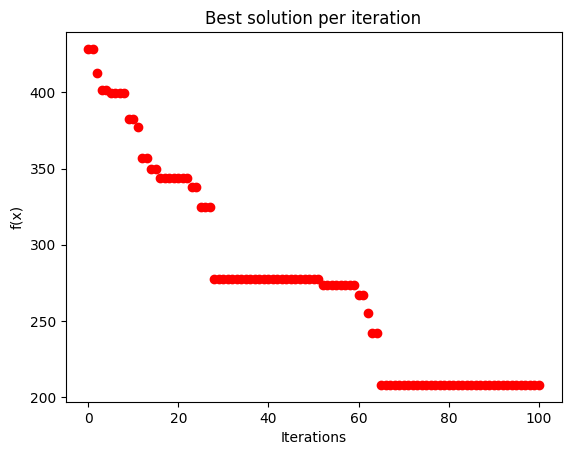

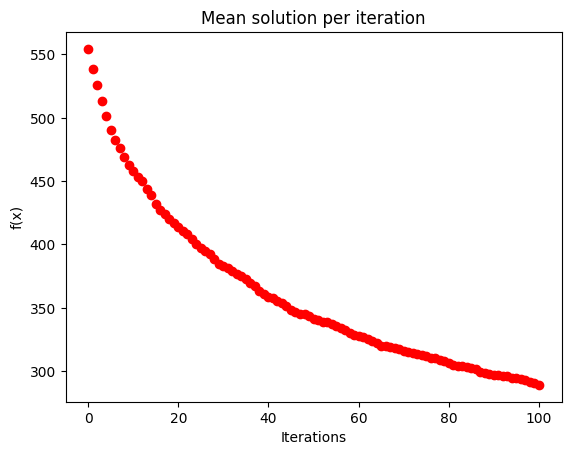

El valor en la función objetivo en la iteración 1 es 207.9192


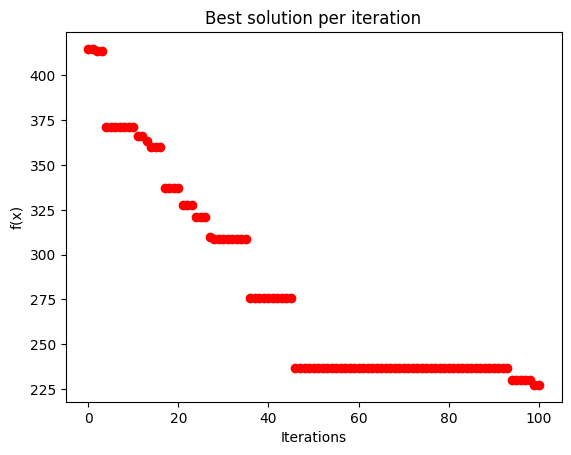

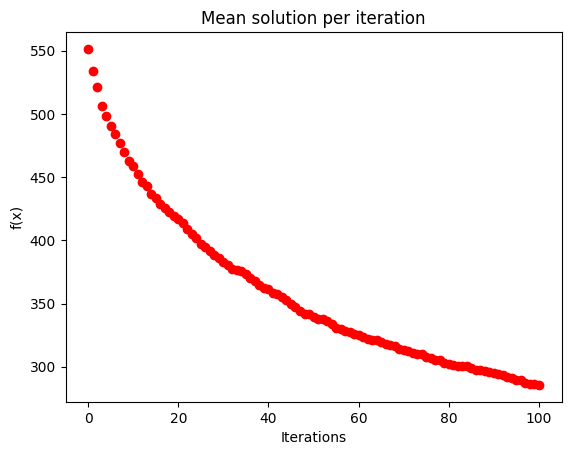

El valor en la función objetivo en la iteración 2 es 227.3035


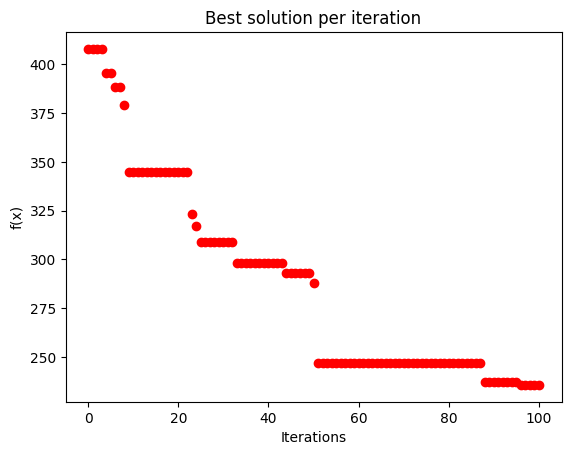

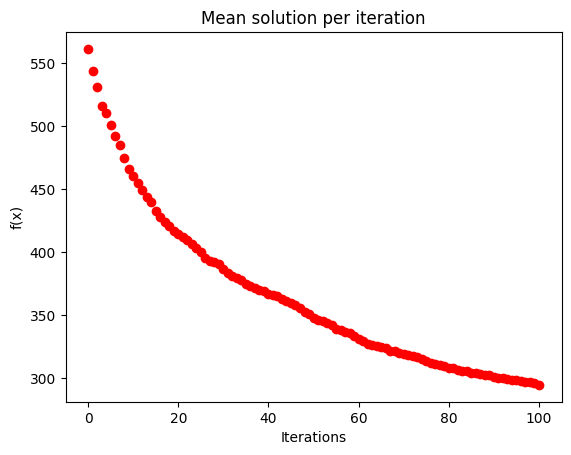

El valor en la función objetivo en la iteración 3 es 235.6656


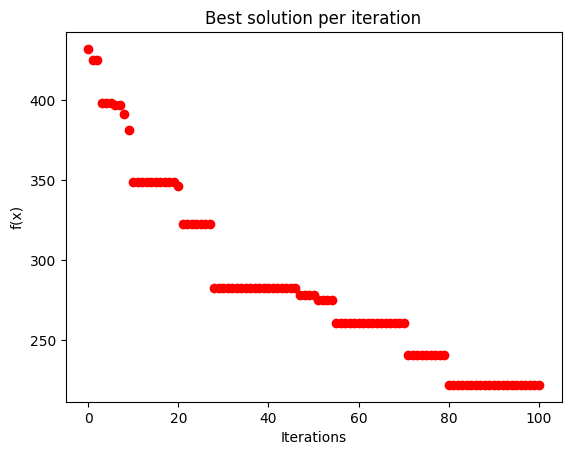

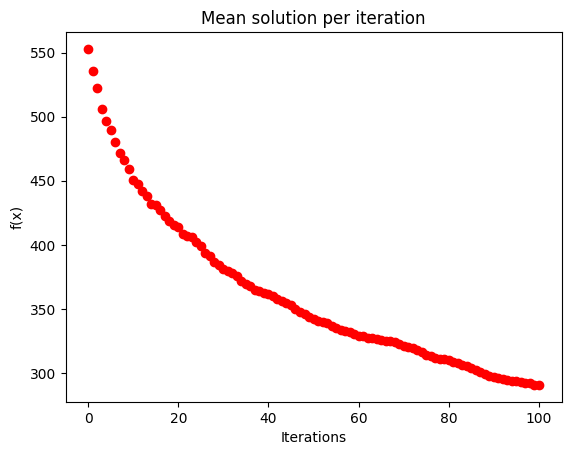

El valor en la función objetivo en la iteración 4 es 222.0536


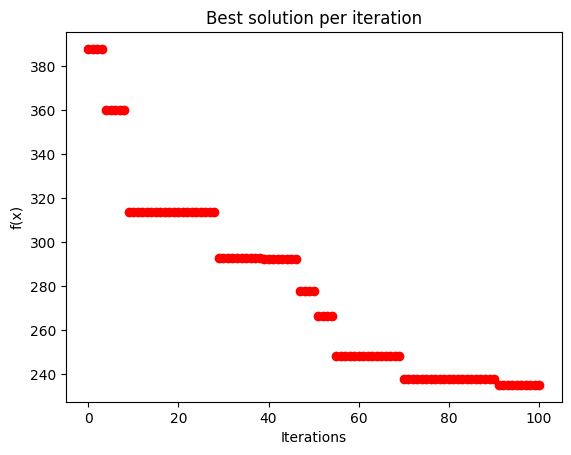

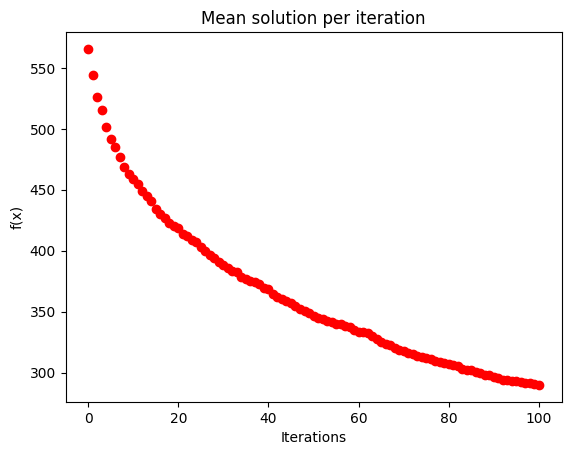

El valor en la función objetivo en la iteración 5 es 235.2133
El mejor valor en la función objetivo es: 207.9192
El peor valor en la función objetivo es: 235.6656


In [22]:
problem = domains["rastrigin"]
fval_prob = []
for t in range(5):
  _, f, _, _ = differential_evolution(fun=problem["fun"],
                                      n_dim=problem["dim"],
                                      lower_bound = problem["domain"][0],
                                      upper_bound = problem["domain"][1],
                                      random_state=t)
  fval_prob.append(np.min(f))
  print('El valor en la función objetivo en la iteración %d es %3.4f'%(t+1, np.min(f)))
print(color.GREEN + color.BOLD + 'El mejor valor en la función objetivo es: %3.4f'%(np.min(fval_prob)) + color.END)
print(color.RED + color.BOLD + 'El peor valor en la función objetivo es: %3.4f'%(np.max(fval_prob)) + color.END)

De las ejecuiones realizadas el **mejor valor encontrado fue el de 207.9192** mientras que **el peor valor fue el de 235.6656**. Lo primero a notar es que estos valores son mucho mejores a los encontrados por la búsqueda aleatoria, sin embargo están muy lejanos todavía del mínimo global que es 0.

Hasta ahora, con la configuración utilizada el algoritmo ha sido capaz de explorar suficientemente el espacio de búsqueda.

En las cinco iteraciones el algoritmo está en intervalos muy cercanos entre 200 y 250, lo que quiere decir que aunque los resultados son más _consistentes_ que los encontrados por búsqueda aleatoria, el algoritmo puede estar convergiendo a una región equivocada del espacio, estancándose y por eso no mejora la solución encontrada.

Como comentario adicional, el reducir el espacio de búsqueda aquí también es una posibilidad para ayudar al algoritmo a evitar estancamientos. Si no quisiéramos reducir el espacio de búsqueda, podríamos incrementar el tamaño de la población en haras de mejorar el desempeño y ver si logramos explorar otras partes del espacio y evitar este posible estancamiento

Otra forma de intuir el posible estancamiento del algoritmo es analizando la solución promedio por iteración y la gráfica con las soluciones de la población, vemos cómo al principio hubo un descenso rápido en los valores de la solución, lo que es bueno porque estamos trabajando en una tarea de minimización, pero conforme las iteraciones aumentas, la curva disminuye cada vez más lentamente siendo un sinónimo de este posible estancamiento y la convergencia temprana del algoritmo.

Revisando ahora con la función de Ackley:

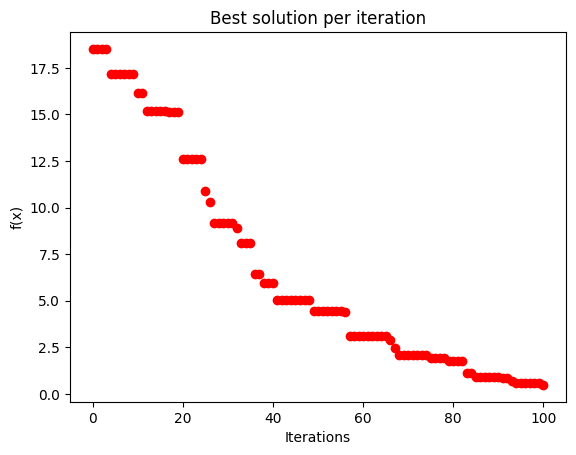

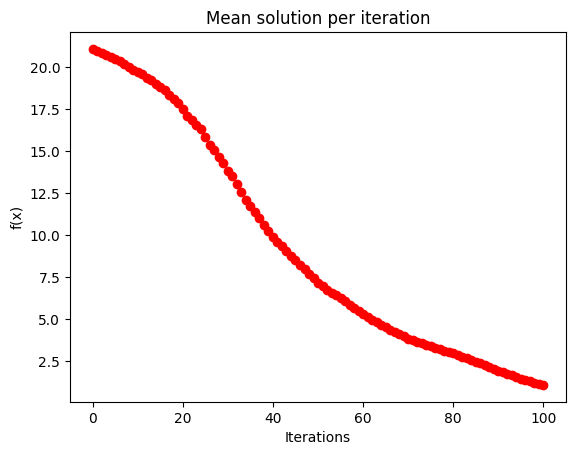

El valor en la función objetivo en la iteración 1 es 0.4840


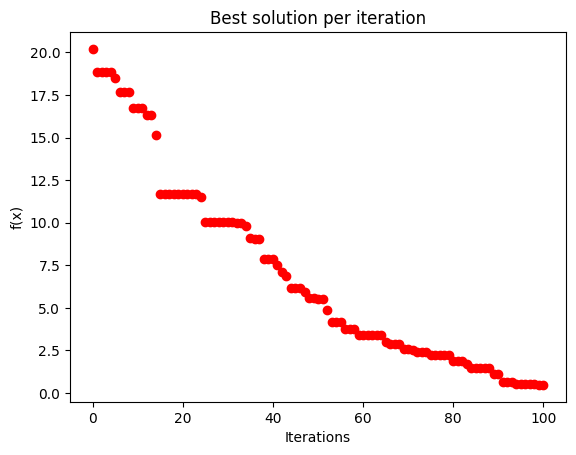

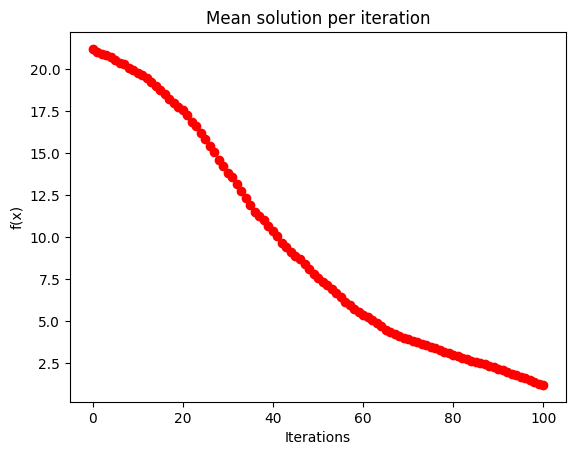

El valor en la función objetivo en la iteración 2 es 0.4776


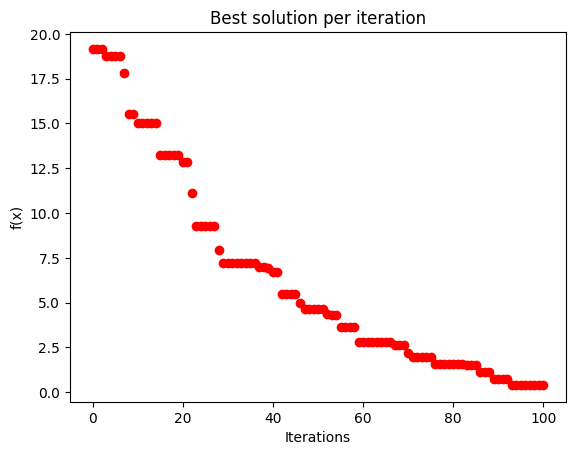

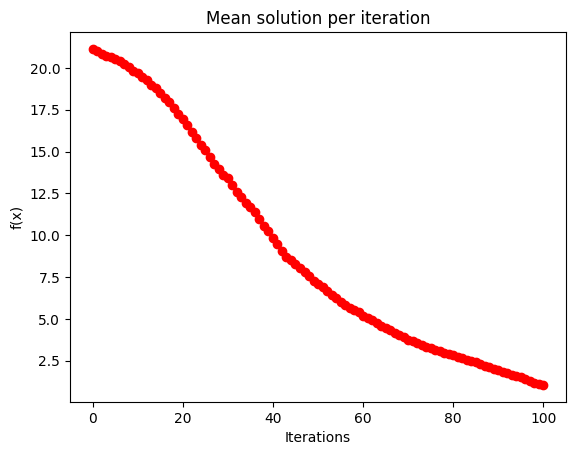

El valor en la función objetivo en la iteración 3 es 0.4117


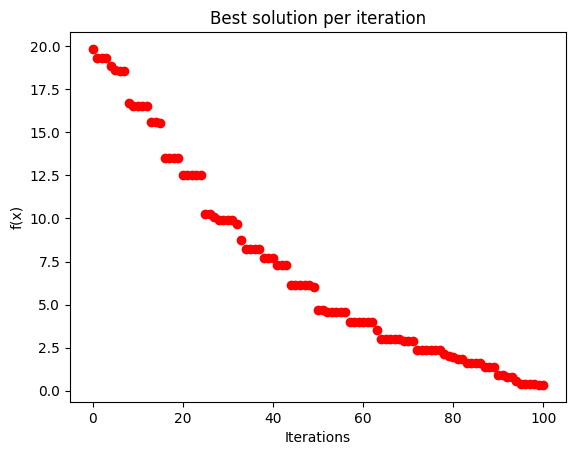

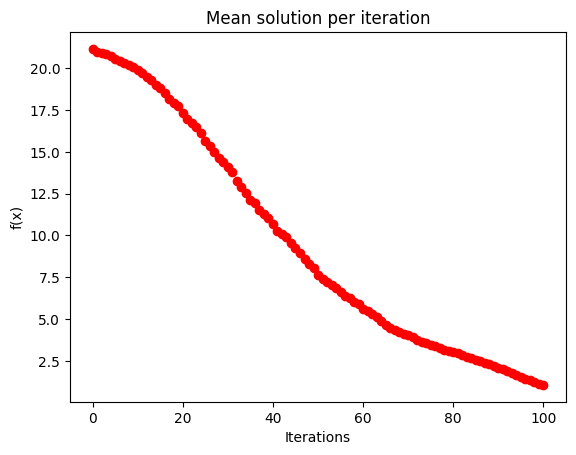

El valor en la función objetivo en la iteración 4 es 0.3348


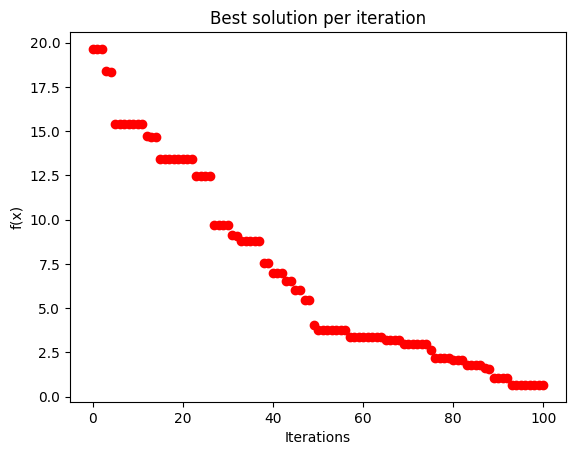

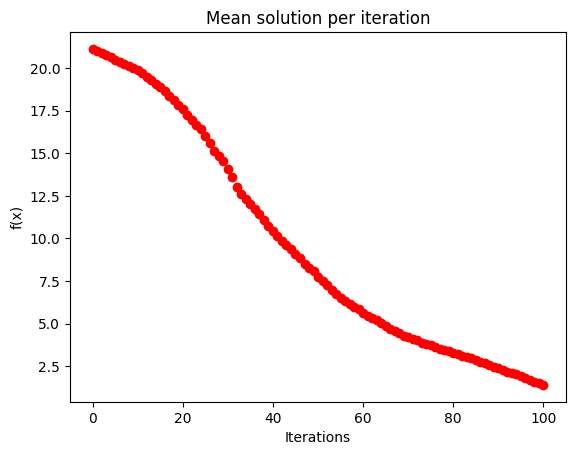

El valor en la función objetivo en la iteración 5 es 0.6650
El mejor valor en la función objetivo es: 0.3348
El peor valor en la función objetivo es: 0.6650


In [23]:
problem = domains["ackley"]
fval_prob = []
for t in range(5):
  _, f, _, _ = differential_evolution(fun=problem["fun"],
                                      n_dim=problem["dim"],
                                      lower_bound = problem["domain"][0],
                                      upper_bound = problem["domain"][1],
                                      random_state=t)
  fval_prob.append(np.min(f))
  print('El valor en la función objetivo en la iteración %d es %3.4f'%(t+1, np.min(f)))
print(color.GREEN + color.BOLD + 'El mejor valor en la función objetivo es: %3.4f'%(np.min(fval_prob)) + color.END)
print(color.RED + color.BOLD + 'El peor valor en la función objetivo es: %3.4f'%(np.max(fval_prob)) + color.END)

La función de Ackley a diferencia de la función de Rastrigin sí tuvo una mucho mejor y superior convergencia al valor mínimo de la función, que es cero. En las cinco iteraciones, el **mejor valor de la función fue de 0.3348** mientras que el **peor valor de la función es de 0.6650**. Nuevamente el algoritmo muestra una consistencia en las soluciones encontradas en las 5 iteraciones, pues todas las soluciones están entre 0 y 1. Esto es un reflejo de la consistencia del algoritmo en la búsqueda de soluciones y en este caso que esta configuración, tanto de iteraciones, tamaño de la población, factores de cruza y mutación, fueron eficaces par aencontrar un mínimo que podríamos hablar como aceptable. Con esta configuración, el algoritmo no se atascó y como muestras las curvas de los valores promedios por iteración, aunque empezó desde el _pero lugar_ (en las primeras iteraciones el valor de la función estaba muy cerca de 22.3, el límite superior de la imagen de la función) en cada una de las iteraciones la población mejoraba más y más.

Para la función de Ackley fue un gran acierto utilizar el algoritmo de evolución diferencial y resulta muy superior a la búsqueda aleatoria.

Finalmente, analizando la función de Perm:

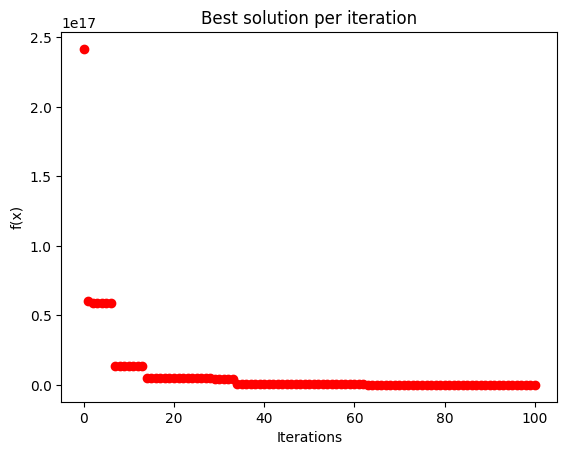

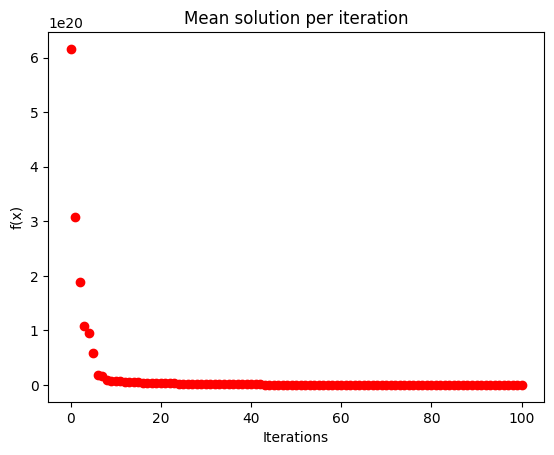

El valor en la función objetivo en la iteración 1 es 43476319952418.7344


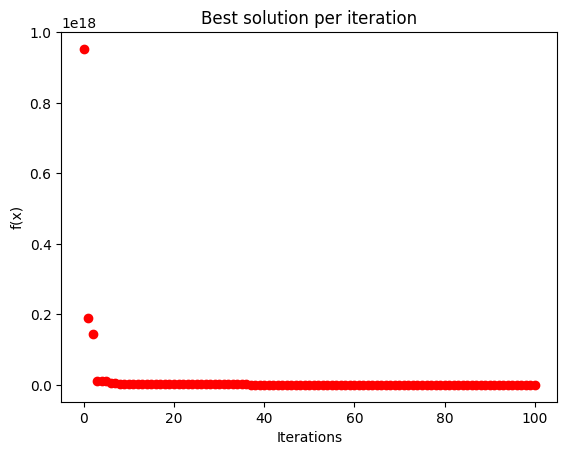

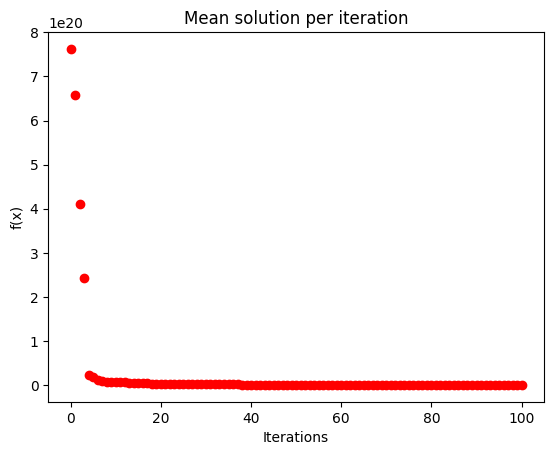

El valor en la función objetivo en la iteración 2 es 21429594480474.6836


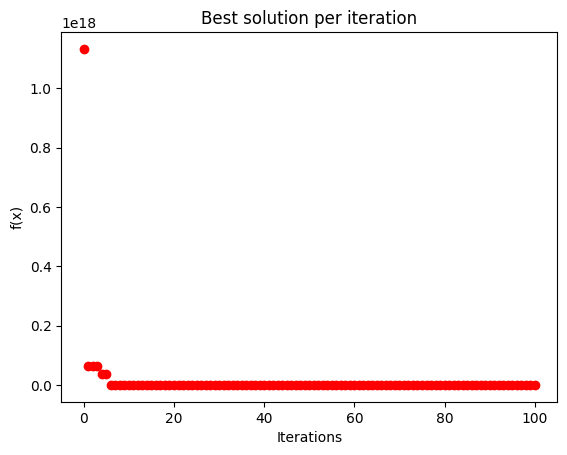

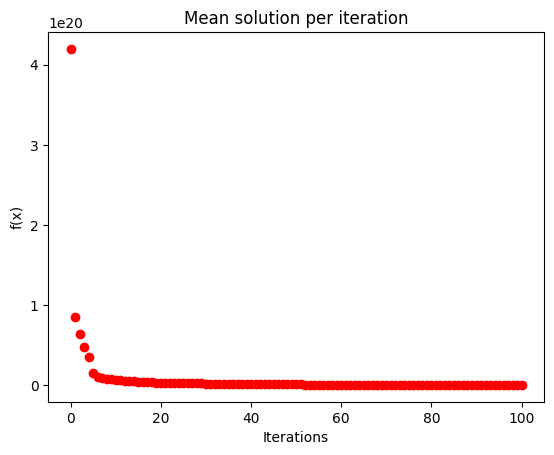

El valor en la función objetivo en la iteración 3 es 57180088310300.0312


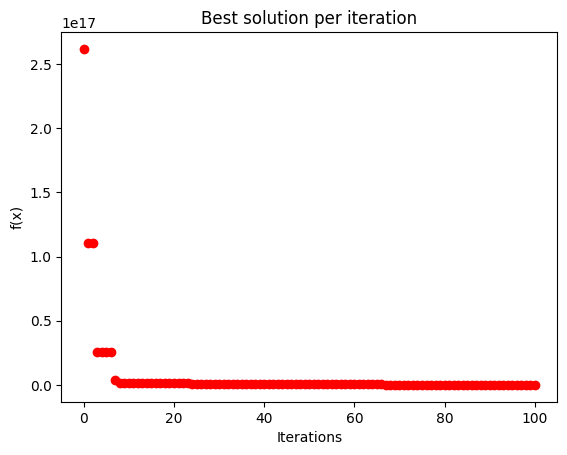

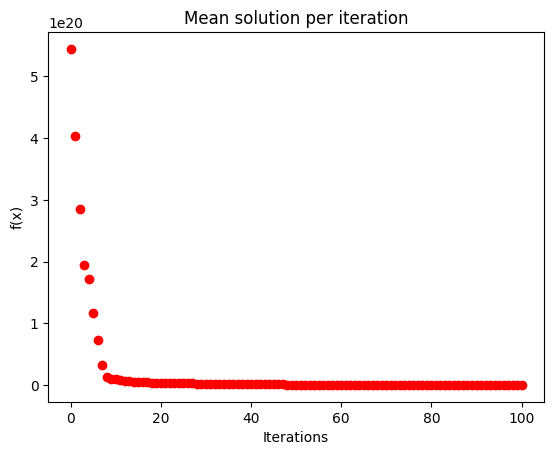

El valor en la función objetivo en la iteración 4 es 39541691060123.3906


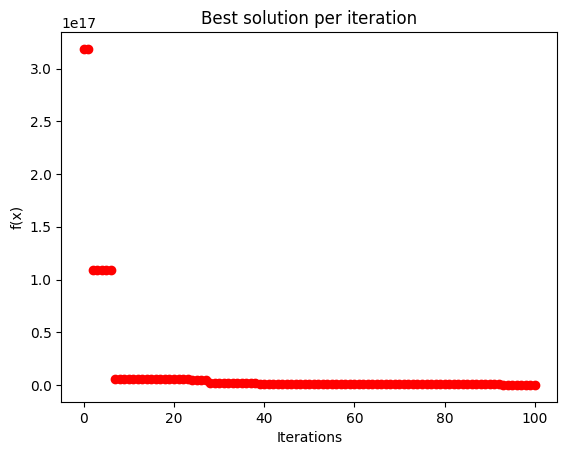

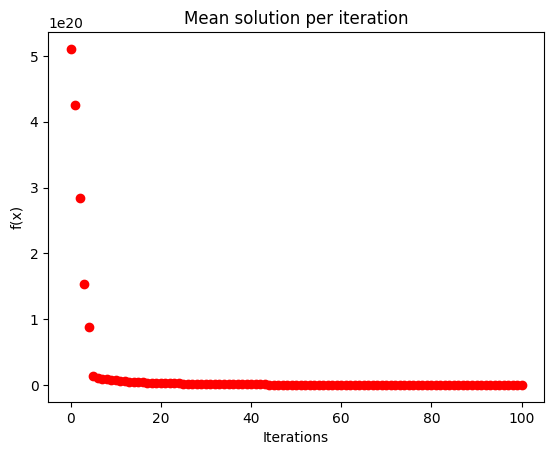

El valor en la función objetivo en la iteración 5 es 55645358719563.0938
El mejor valor en la función objetivo es: 21429594480474.6836
El peor valor en la función objetivo es: 57180088310300.0312


In [24]:
problem = domains["perm"]
fval_prob = []
for t in range(5):
  _, f, _, _ = differential_evolution(fun=problem["fun"],
                                      n_dim=problem["dim"],
                                      lower_bound = problem["domain"][0],
                                      upper_bound = problem["domain"][1],
                                      random_state=t)
  fval_prob.append(np.min(f))
  print('El valor en la función objetivo en la iteración %d es %3.4f'%(t+1, np.min(f)))
print(color.GREEN + color.BOLD + 'El mejor valor en la función objetivo es: %3.4f'%(np.min(fval_prob)) + color.END)
print(color.RED + color.BOLD + 'El peor valor en la función objetivo es: %3.4f'%(np.max(fval_prob)) + color.END)

Para la función de Perm lo que más dificulta la interpretación son los valores tan extremos que puede alcanzar. En este caso vemos que los valores fueron más _mesurados_ pues comenzaron en $10^{20}$ ó $10^{17}$ y además rápidamente la población evolucionó para reducir el valor lo que se aprecia como la parte plana de las gráficas.

No obstante en este caso el algoritmo de evolución diferencial tampoco fue suficiente para encontrar el mínimo de la función, que es 0, pues **el mejor valor encontrado es de  21429594480474.6836** mientras que el peor valor encontrado es de **57180088310300.0312**.


Para esta solución sí podemos hablar de una inconsistencia o falta de convergencia del algoritmo, pues si vemos las curvas, hubo ejecuciones donde la solución por iteración reduce de manera escalonada, en otras se reduce de manera violenta y rápida y otras de manera suave. Este comportamiento puede mejorarse si controlamos los factores de cruza de la población, o mejor aún, si de alguna manera decidimos con qué valores se inicializa la población en la primera iteración, en lugar de que se inicialicen aleatoriamente, reduciendo el problema que tiene el algoritmo al iniciar las iteraciones.

En resumen, podemos concluir que los algoritmos de evolución diferencial son todos una mejora con respecto a los algoritmos de búsqueda aleatoria, pero no significa que sean infalibles o que le mínimo encontrado satisfaga nuestras necesidades, como vimos con la función de Ackley, existen casos donde solucionan el problema de optimización y otros donde será necesario cuidar los parámetros y como hemos mencionado, hacer primero un análisis matemático de las funciones o problema que queremos solucionar.

3. Resuelva los problemas de optimización del ejercicio 1, usando optimización por enjambre de partículas con un tamaño de población de 100, durante 100 iteraciones y los parámetros $\omega = 0.5$ y $C1 = 1$ y $C2 = 1$ _(25 puntos)_

En los algoritmos PSOcad partícula representa una solución candidata en el espacio de búsqueda y se desplaza de forma iterativa ajustando su trayectoria según su mejor posición histórica y mejor posición encontrada por su vecindario. Este es un enfoque colaborativo que permite explorar regiones prometedoras del espacio de soluciones.

La función `pso` implementa el algoritmo de enjambre de partículas generando posiciones aleatorias. Calcula la calidad (*fitness*) de cada partícula usando la función objetivo (`fun`) y define grupos de 5 partículas para compartir información local. De manera iterativa ajusta las velocidades y posiciones de las partículas y actualiza las mejores soluciones personales y globales.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.validation import check_random_state


def pso(
    fun,
    n_dim,
    lower_bound=0,
    upper_bound=1,
    swarm_size=100,
    inertia_weight=0.5,
    c1=1,
    c2=1,
    max_iters=100,
    random_state=None):
    """
    Optimiza una función usando Particle Swarm Optimization (PSO).

    Args:
        fun (callable): Función objetivo a minimizar
        n_dim (int): Dimensión del problema (número de variables).
        lower_bound (float/int o array-like): Límite inferior del espacio de búsqueda.
        upper_bound (float/int o array-like): Límite superior del espacio de búsqueda.
        swarm_size (int): Número de partículas en el enjambre.
        inertia_weight (float): Peso de inercia para controlar la exploración.
        c1 (float): Factor de aprendizaje cognitivo (influencia de la mejor posición personal).
        c2 (float): Factor de aprendizaje social (influencia del vecindario).
        max_iters (int): Número máximo de iteraciones.
        random_state (int/None): Semilla para reproducibilidad.

    Returns:
        tuple:
            - scaled_swarm (np.ndarray): Posiciones finales del enjambre (escaladas al dominio original).
            - fit (np.ndarray): Fitness de cada partícula en la última iteración.
            - particle_best (dict): Mejor solución global encontrada, con claves 'position' y 'quality'.
    """

    # Inicializar manejador de números aleatorios
    random_state = check_random_state(random_state)

    # Crear enjambre inicial y velocidades
    swarm_position = random_state.uniform(size=(swarm_size, n_dim))
    swarm_velocity = np.zeros((swarm_size, n_dim))

    # Evaluar calidad inicial de cada partícula
    fit = np.array([
        fun((upper_bound - lower_bound) * particle + lower_bound)
        for particle in swarm_position])

    # Mejores posiciones personales
    personal_best = {
        'position': swarm_position.copy(),
        'quality': fit.copy()}

    # Vecindarios aleatorios de tamaño 5
    neighborhood = np.argsort(
        random_state.uniform(size=(swarm_size, swarm_size)))[:, :5]

    # Mejor partícula global
    best_idx = np.argmin(fit)
    particle_best = {
        'position': swarm_position[best_idx].copy(),
        'quality': fit[best_idx]}

    history_best = []
    history_mean = []

    for _ in range(max_iters):
        # Encontrar la mejor partícula en cada vecindario
        idx_best = np.argmin(fit[neighborhood], axis=1)
        best_neighbors = neighborhood[np.arange(swarm_size), idx_best]

        # Actualizar velocidades
        swarm_velocity *= inertia_weight
        swarm_velocity += c1 * random_state.uniform() * (
            personal_best['position'] - swarm_position)
        swarm_velocity += c2 * random_state.uniform() * (
            swarm_position[best_neighbors] - swarm_position)

        # Mover partículas y asegurar límites [0, 1]
        swarm_position = np.clip(swarm_position + swarm_velocity, 0, 1)

        # Evaluar nuevas posiciones
        fit = np.array([
            fun((upper_bound - lower_bound) * particle + lower_bound)
            for particle in swarm_position])

        # Actualizar mejores personales
        is_improved = fit < personal_best['quality']
        if np.any(is_improved):
            personal_best['position'][is_improved] = swarm_position[is_improved]
            personal_best['quality'][is_improved] = fit[is_improved]

        # Actualizar mejor global
        current_min = np.min(fit)
        if current_min < particle_best['quality']:
            best_idx = np.argmin(fit)
            particle_best = {
                'position': swarm_position[best_idx].copy(),
                'quality': current_min}

        history_best.append(particle_best['quality'])
        history_mean.append(np.mean(fit))

    # Graficar resultados
    plt.figure()
    plt.plot(history_best, 'ro')
    plt.ylabel('f(x)')
    plt.xlabel('Iteraciones')
    plt.title('Mejor solución por iteración')
    plt.show()

    plt.figure()
    plt.plot(history_mean, 'ro')
    plt.ylabel('f(x)')
    plt.xlabel('Iteraciones')
    plt.title('Solución promedio por iteración')
    plt.show()

    # Ajustar posiciones a los límites originales
    scaled_swarm = (upper_bound - lower_bound) * swarm_position + lower_bound
    particle_best['position'] = (
        (upper_bound - lower_bound) * particle_best['position'] + lower_bound)

    return scaled_swarm, fit, particle_best

Comenzando el análisis con la función de Rastrigin:

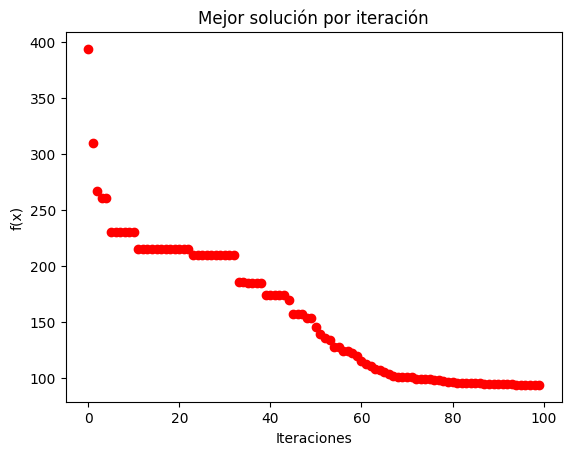

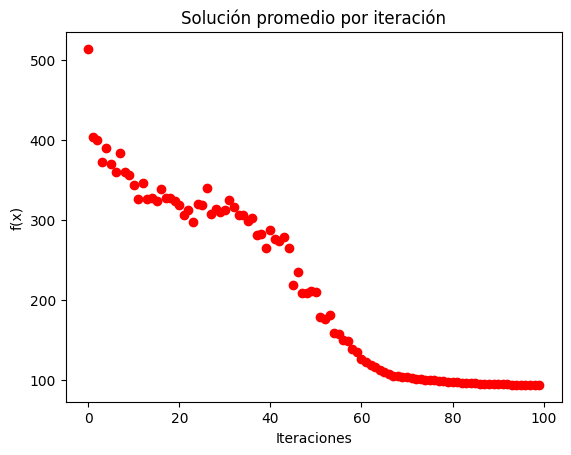

El valor en la función objetivo en la iteración 1 es 94.0154


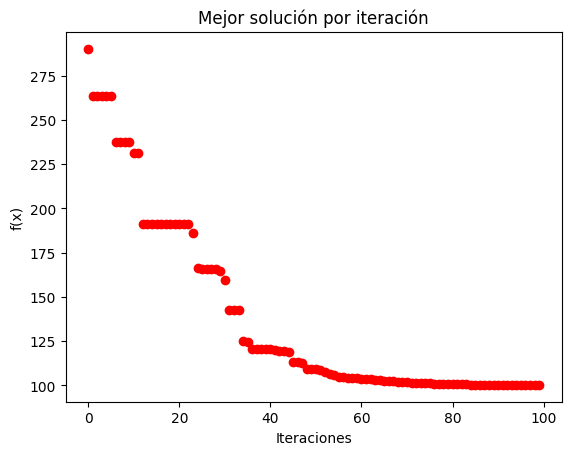

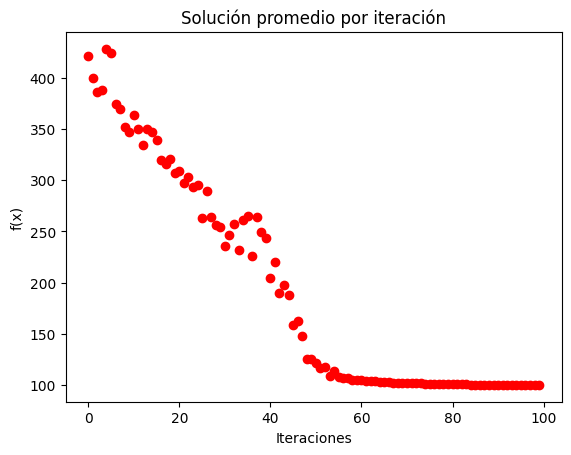

El valor en la función objetivo en la iteración 2 es 100.2182


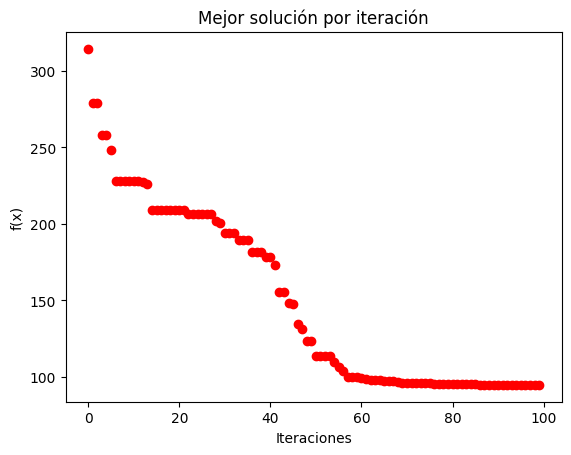

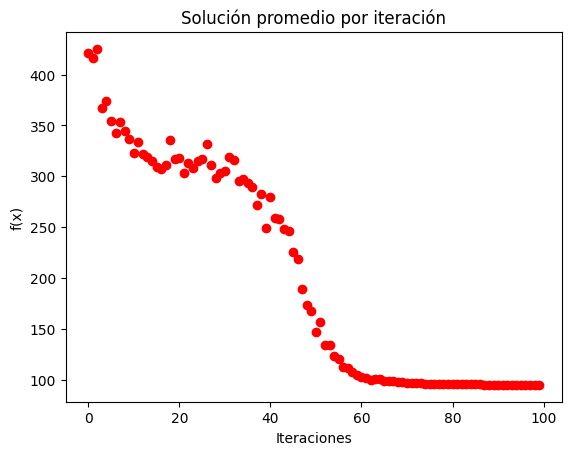

El valor en la función objetivo en la iteración 3 es 94.6733


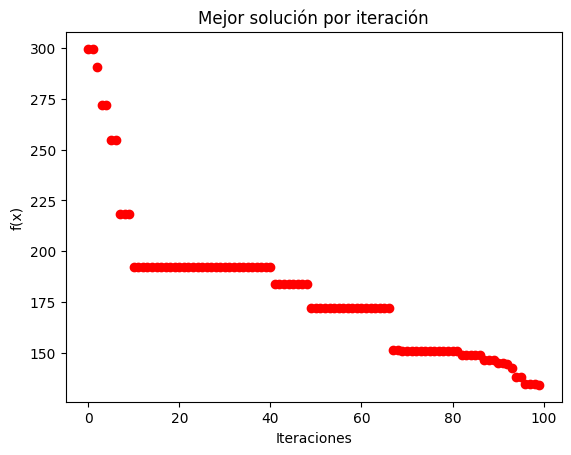

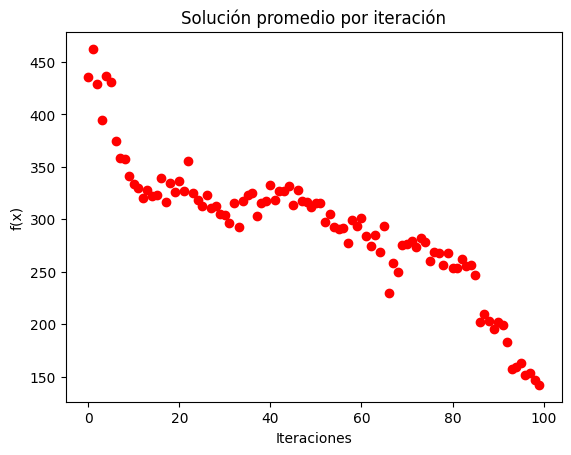

El valor en la función objetivo en la iteración 4 es 134.1090


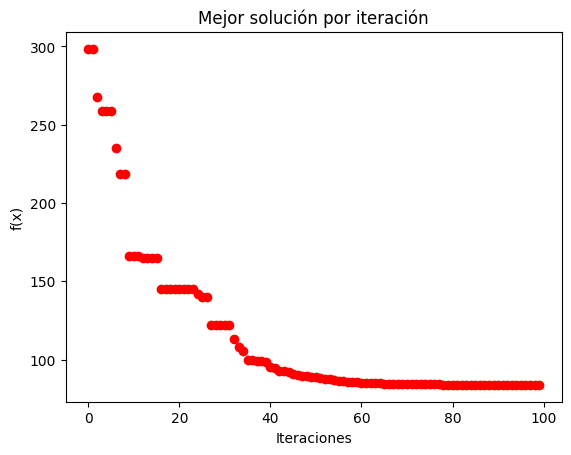

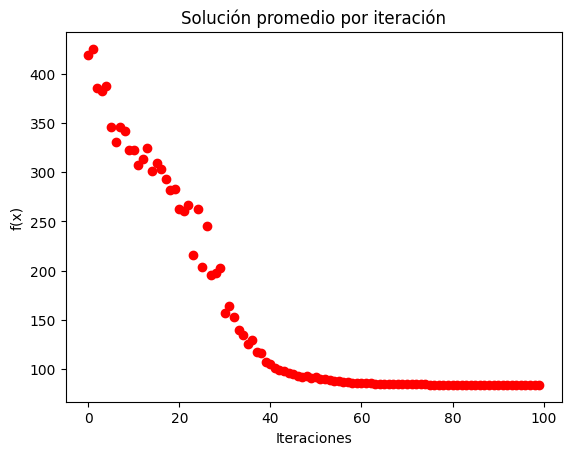

El valor en la función objetivo en la iteración 5 es 83.7788
El mejor valor en la función objetivo es: 83.7788
El peor valor en la función objetivo es: 134.1090


In [26]:
problem = domains["rastrigin"]
fval_prob = []
for t in range(5):
  _, f, _ = pso(fun=problem["fun"],
                n_dim=problem["dim"],
                lower_bound = problem["domain"][0],
                upper_bound = problem["domain"][1],
                random_state=t)
  fval_prob.append(np.min(f))
  print('El valor en la función objetivo en la iteración %d es %3.4f'%(t+1, np.min(f)))
print(color.GREEN + color.BOLD + 'El mejor valor en la función objetivo es: %3.4f'%(np.min(fval_prob)) + color.END)
print(color.RED + color.BOLD + 'El peor valor en la función objetivo es: %3.4f'%(np.max(fval_prob)) + color.END)

Notemos que en este algoritmo, a pesar de mostrar la mejor solución hasta ahora para la función de Rastrigin, sigue estancándose en regiones del espacio de soluciones, pues en lar curvas de la solución promedio por iteración, observamos como las curvas se aplanan rápidamente lo que quiere decir que el enjambre ya no se desplaza por el espacio de búsqueda y se ha quedado en cierta región del espacio, donde los valores de la función son de  aproximadamente $100$. A difierencia del algoritmo de evolución diferencial, las partículas se _atoraron_ en un mejor mínimo local, algo que habíamos detectado en el análisis de la función al principio de la tarea, que estas funciones tienen muchos mínimos locales que pueden dificultar el avance de los algoritmos.

Para esta ejecución, el **mejor valor para la función objetivo fue de 83.7788** mientras que el **peor valor encontrado en las cinco iteraciones del algoritmo fue de 134.1090**

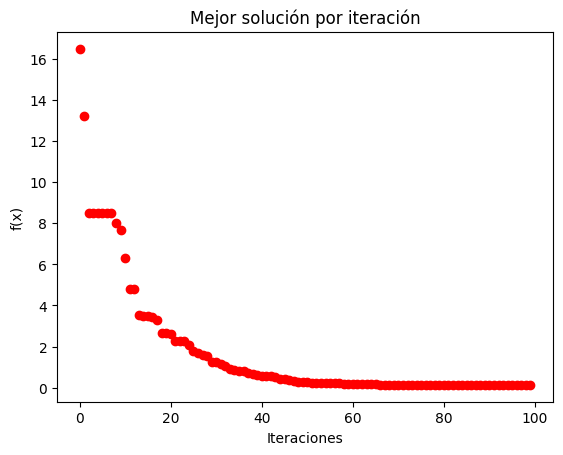

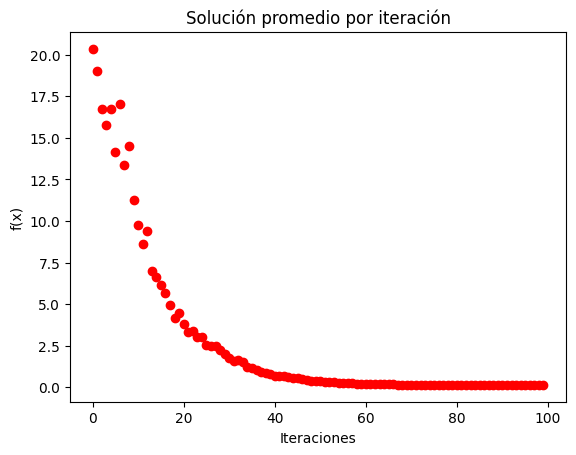

El valor en la función objetivo en la iteración 1 es 0.1402


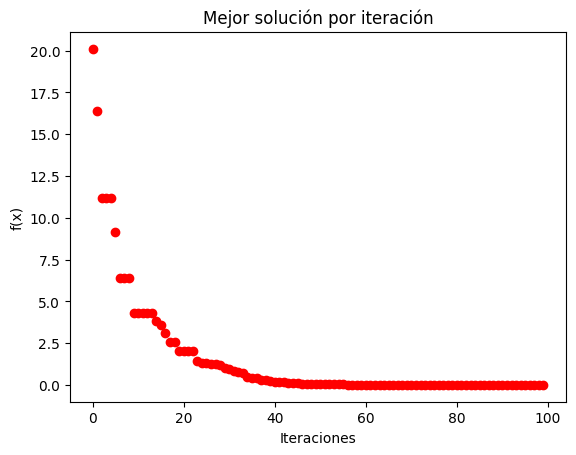

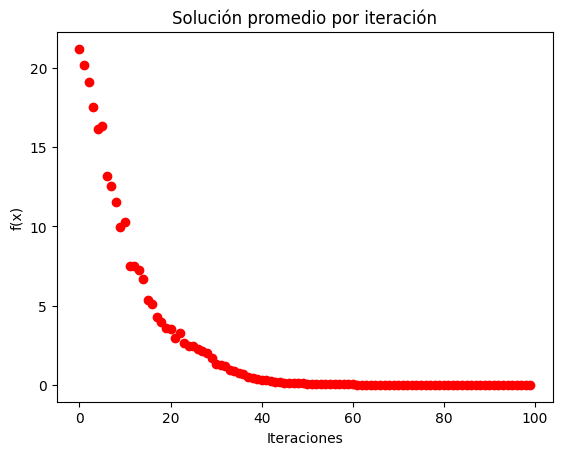

El valor en la función objetivo en la iteración 2 es 0.0046


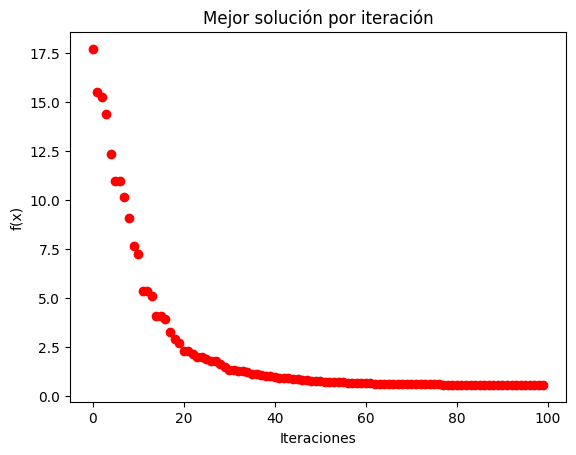

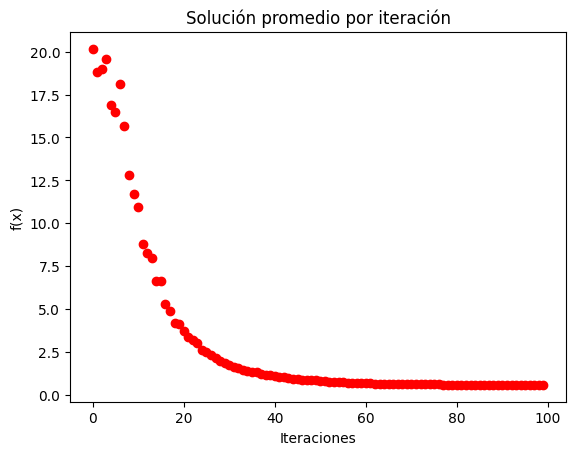

El valor en la función objetivo en la iteración 3 es 0.5666


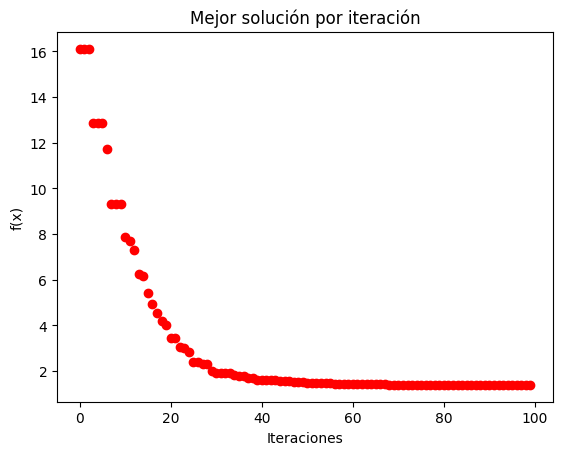

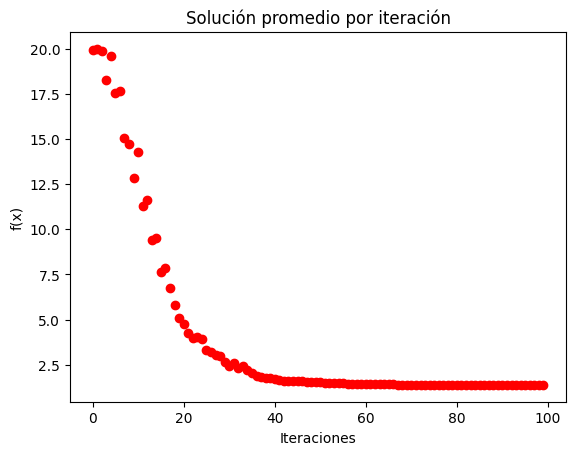

El valor en la función objetivo en la iteración 4 es 1.3893


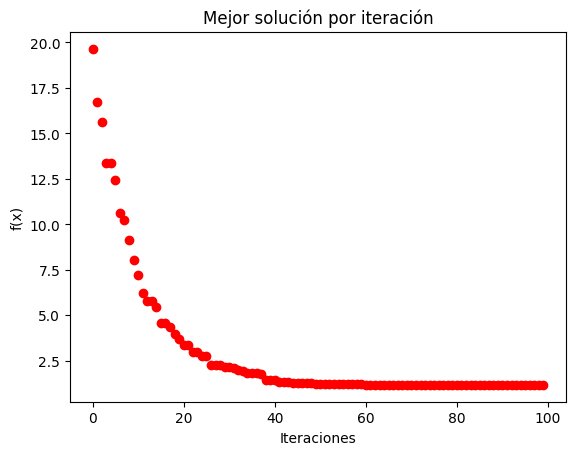

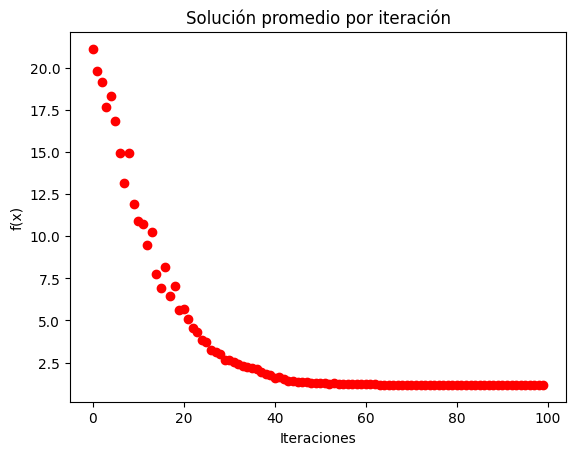

El valor en la función objetivo en la iteración 5 es 1.1710
El mejor valor en la función objetivo es: 0.0046
El peor valor en la función objetivo es: 1.3893


In [27]:
problem = domains["ackley"]
fval_prob = []
for t in range(5):
  _, f, _ = pso(fun=problem["fun"],
                n_dim=problem["dim"],
                lower_bound = problem["domain"][0],
                upper_bound = problem["domain"][1],
                random_state=t)
  fval_prob.append(np.min(f))
  print('El valor en la función objetivo en la iteración %d es %3.4f'%(t+1, np.min(f)))
print(color.GREEN + color.BOLD + 'El mejor valor en la función objetivo es: %3.4f'%(np.min(fval_prob)) + color.END)
print(color.RED + color.BOLD + 'El peor valor en la función objetivo es: %3.4f'%(np.max(fval_prob)) + color.END)

Para la función de Ackley el algoritmo PSO también tuvo un muy buen desempeño, convergiendo mucho más rapido que el algoritmo de evolución diferencial, no obstante las soluciones encontradas fueron un poco peores a las encontradas por el algoritmo de evolución diferencial en la mayoría de los casos, esto refleja que para el algoritmo PSO puede que un número menor de iteraciones no afecte el resultado encontrado mientras que para el algoritmo de evolución diferencial en la función de ACkley, incrementear el número de iteraciones pudiera haber mejorado más la calidad de la solución encontrada.

Para este caso, **el mejor valor de la función objetivo es de 0.0046** mientras que el **peor valor en las cinco iteraciones es de 1.3893**.

Mostrando una rápida convergencia y estabilidad de las soluciones.

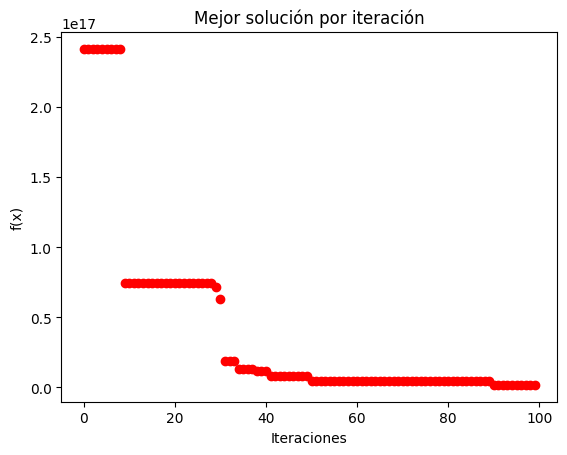

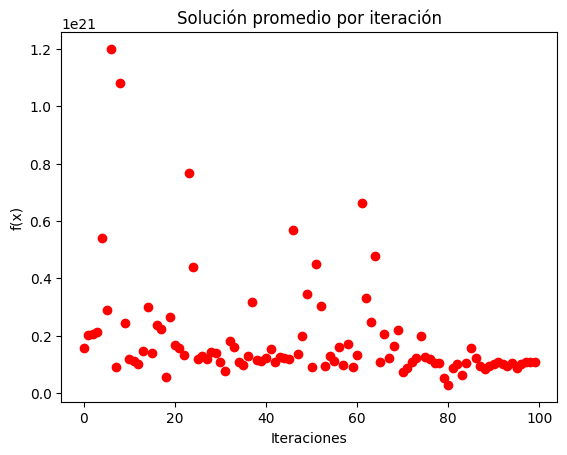

El valor en la función objetivo en la iteración 1 es 454775662489555904.0000


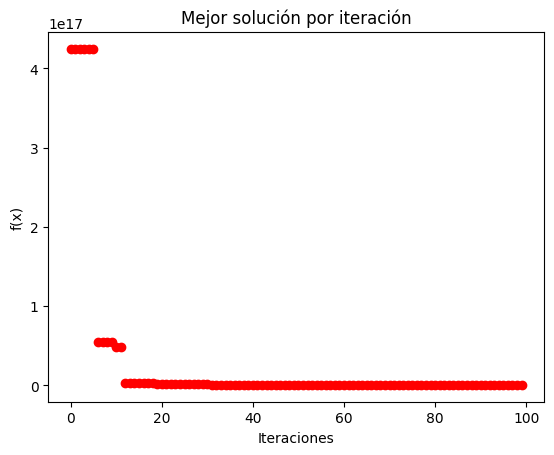

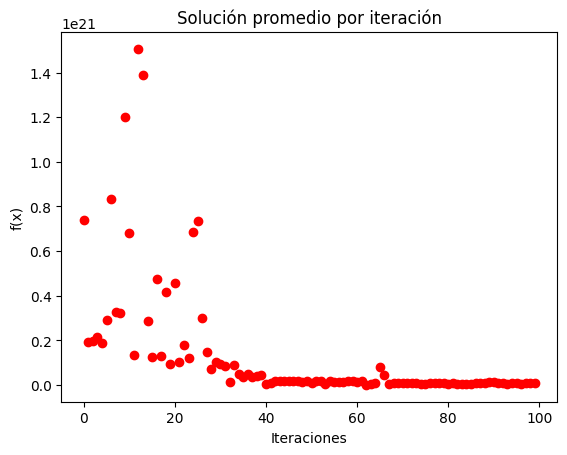

El valor en la función objetivo en la iteración 2 es 876072280618716.1250


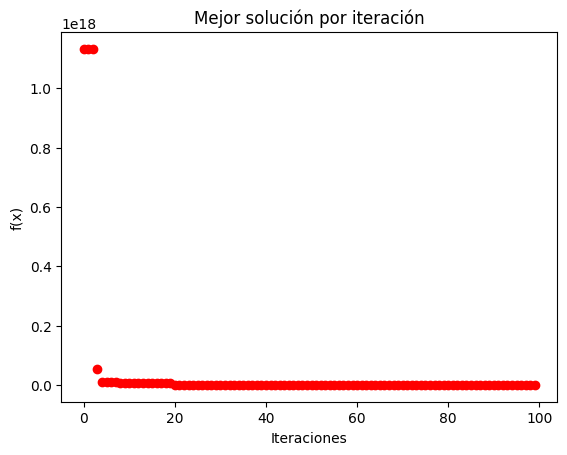

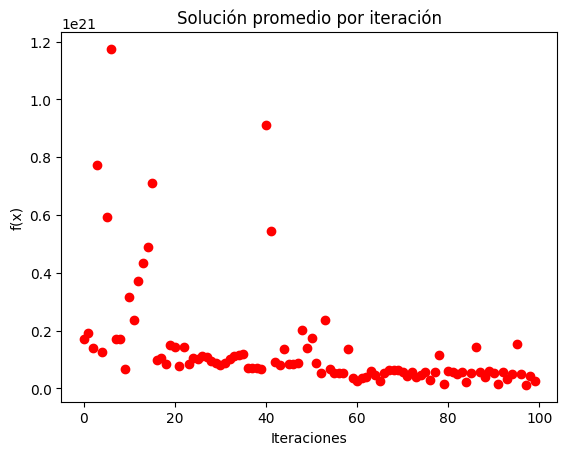

El valor en la función objetivo en la iteración 3 es 867659061430427.5000


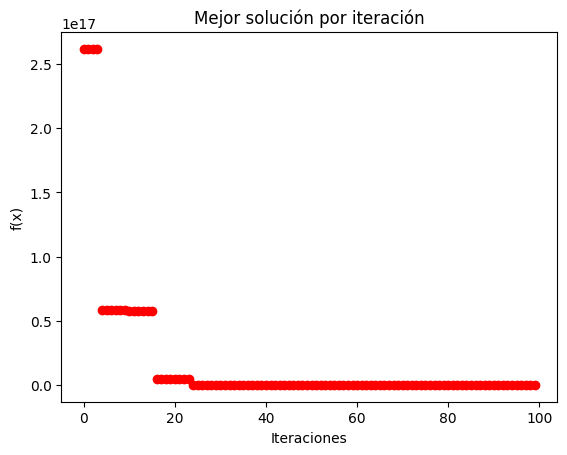

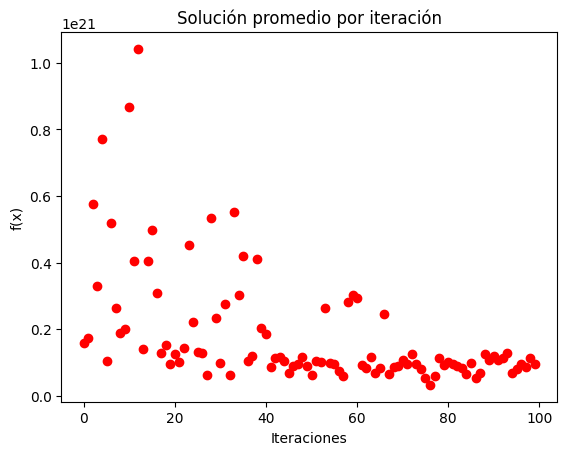

El valor en la función objetivo en la iteración 4 es 66190458334667.3438


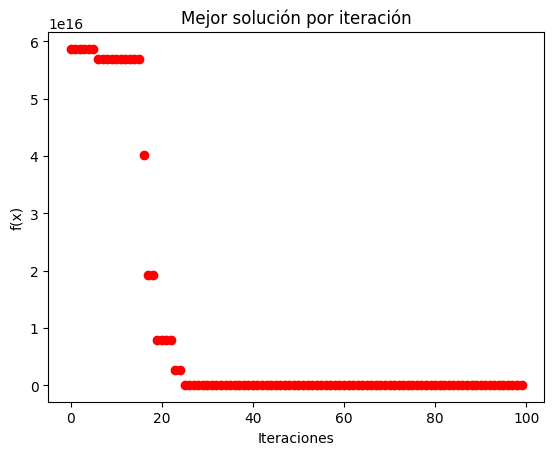

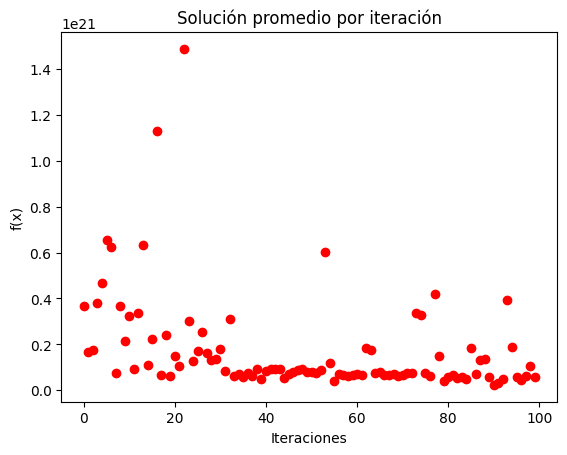

El valor en la función objetivo en la iteración 5 es 172760424294307.3750
El mejor valor en la función objetivo es: 66190458334667.3438
El peor valor en la función objetivo es: 454775662489555904.0000


In [28]:
problem = domains["perm"]
fval_prob = []
for t in range(5):
  _, f, _ = pso(fun=problem["fun"],
                n_dim=problem["dim"],
                lower_bound = problem["domain"][0],
                upper_bound = problem["domain"][1],
                random_state=t)
  fval_prob.append(np.min(f))
  print('El valor en la función objetivo en la iteración %d es %3.4f'%(t+1, np.min(f)))
print(color.GREEN + color.BOLD + 'El mejor valor en la función objetivo es: %3.4f'%(np.min(fval_prob)) + color.END)
print(color.RED + color.BOLD + 'El peor valor en la función objetivo es: %3.4f'%(np.max(fval_prob)) + color.END)

Para la función Perm notemos que el algoritmo de ensamble de partículas tiene muchas dificultades para encontrar una zona a explorar, pues aunque en la mejor solución por iteración se nota una clara tendencia a mejorar (reducir) el valor de la función, cuando vemos las solciones promedio por iteración refleja como el enjambre de partículas es muy dispar y hay soluciones muy muy alejadas de la mejor y no se nota una tendencia clara en el cambio (actualización) del enjambre.

Esta función fue la más difícil de explorar para los tres algoritmos y en todos los casos no se encontró un valor lo suficientemente bueno, donde el espacio de soluciones a explorar parece que es el más difícil.

En este caso donde parece muy díficil el espacio de soluciones parece recomendable reducirlo o incluso explorar la posibilidad de explorarlo por partes para ir descartando. Si incrementaramos la dimensión del vector x (recordemos que es de 10 dimensiones) probablemente el problema se dificulta mucho más y los algoritmos empeoren todavía más su desempeño.

En este caso, después de las cinco iteraciones **el mejor valor de la función fue de 66190458334667.3438** mientras que el **peor valor de la función de Perm fue de 454775662489555904.0000**

4. Considere el método de regresión lineal con gradiente estocástico. Genere un conjunto de datos artificial con 10,000 ejemplos y 50 características. Evalúe el desempeño de la regresión lineal con gradiente estocástico considerando las tasas de aprendizaje de 0.001, 0.01 y 0.1. Compare en término de la aproximación a los valores de los coeficientes reales y la velocidad
de convergencia *(25 puntos)*

En la regresión lineal con gradiente estocástico los coeficientes se actualizan iterativamente utilizando muestras aleatorias de datos. Este método permite aproximar la solución cuando se trabaja con grandes conjuntos de datos, evitando el procesamiento de todo el conjunto de datos en cada iteración.

La clase `SGD_LR` es una implementación en python de la regresión lineal con gradiente estocástico que sirve para ajustar los coeficientes de acuerdo a los datos proporcionados y realizar predicciones de acuerdo a los coeficientes que fueron calculados empleando el gradiente estocástico.

El método `fit` codifica el proceso de entrenamiento. En este método, se validan y preparan los datos de entrada y se inicializan los parámetros del modelo. A lo largo de varias iteraciones, se toma el lote aletorio de los datos originales y se calcula el error entre las predicciones y los valores reales para cada muestra. Este error se utiliza para determinar los gradientes respecto al intercepto y los coeficientes, que luego se actualizan de acuerdo con la tasa de aprendizaje. Este proceso se repite en cada paso, lo que resulta en una evolución gradual hacia la solución.

La tasa de aprendizaje, (`learning_rate`), es un parámetro clave ya que determina el tamaño de los pasos en los que se modifican los coeficientes en cada iteración. La tase de aprendizaje se relaciona con la convergencia y estabilidad de la solución: un valor demasiado pequeño puede ralentizar el proceso, mientras que un valor excesivo puede provocar oscilaciones o incluso la divergencia del algoritmo.

Por estas razones, hemos creado dos atributos en la clase `SGD_LR` llamados `loss_history` & `beta_updates`, con el propósito de registrar cómo en cada iteración y después de ser procesado un lote aleatorio de los datos, los parámetros de la regresión lineal son ajustados y el error cambia.

Así al finalizar el entrenamiento, tendremos una secuencia de valores que nos permitirá analizar cómo evoluciona el error y cómo se ajustan los parámetros de la regresión lineal en función del número de iteraciones para distintas tasas de aprendizaje.

Una vez entrenado, el método `predict` utiliza los parámetros aprendidos para generar predicciones sobre nuevos datos, realizando la combinación lineal entre las características y los coeficientes, y sumando el intercepto.

In [29]:
class SGD_LR:
    """
    Regresión lineal con gradiente estocástico.

    SGD_RLR(learning_rate=0.001, max_iters=1000, random_state=None)

    Parameters
    ----------
    learning_rate : float
        Tasa de aprendizaje.
    max_iters : int
        Número máximo de iteraciones.
    random_state : int, optional
        Semilla para números aleatorios.
    """

    def __init__(self, learning_rate: float = 0.001,
                 max_iters: int = 1000,
                 batch_size = 50,
                 random_state=None):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.random_state = random_state
        self.batch_size = batch_size
        self.beta_updates = []
        self.loss_history = []

    def fit(self, X, y):
        """
        Ajusta el modelo a los datos.

        Parameters
        ----------
        X : array-like, shape (m, n)
            Datos de entrada.
        y : array-like, shape (m,)
            Valores objetivo.

        Returns
        -------
        self : object
            Retorna el objeto ajustado.
        """
        random_state = check_random_state(self.random_state)
        X, y = check_X_y(X, y)
        m, n = X.shape
        beta_0 = 0
        beta_j = np.zeros(n)

        for _ in range(self.max_iters):
            X_batch, y_batch = shuffle(X, y,
                                       random_state=self.random_state,
                                       n_samples=self.batch_size)
            for x_i, y_i in zip(X_batch, y_batch):
                error = y_i - beta_0 - np.dot(beta_j, x_i)
                grad_beta_0 = -2 * error
                grad_beta_j = -2 * (error * x_i)

                beta_0 -= self.learning_rate * grad_beta_0
                beta_j -= self.learning_rate * grad_beta_j

            y_pred = np.dot(X_batch, beta_j) + beta_0
            loss = np.mean((y_batch - y_pred) ** 2)
            self.loss_history.append(loss)
            self.beta_updates.append(beta_j.copy())

        self.intercept_ = beta_0
        self.coefficients_ = beta_j
        return self

    def predict(self, X):
        """
        Realiza predicciones utilizando el modelo ajustado.

        Parameters
        ----------
        X : array-like, shape (m, n)
            Datos de entrada.

        Returns
        -------
        predictions : array-like, shape (m,)
            Predicciones del modelo.
        """
        return np.dot(X, self.coefficients_) + self.intercept_


En primer lugar, utilizamos la función `make_regression` para generar un conjunto de datos sintéticos para la tarea de regresión. creando 10,000 muestras, con 50 características, y añadimos un sesgo de 0.25 y un nivel de ruido de 0.1 para simular la variabilidad en los datos.

Además, solicitamos que se retorne el vector de coeficientes reales (`coef_reg`), lo que nos permite comparar los coeficientes estimados por nuestro modelo con los verdaderos.

Posteriormente, definimos una lista de tasas de aprendizaje con los valores 0.001, 0.01 y 0.02. Para cada una de estas tasas, entrenamos un modelo de regresión lineal utilizando gradiente estocástico mediante la clase `SGD_LR`, ajustando el modelo a los datos generados. Luego, calculamos el error cuadrático medio (MSE) entre los coeficientes aprendidos y los coeficientes reales evaluando el impacto que tiene el `learning_rate` en la precisión del modelo.

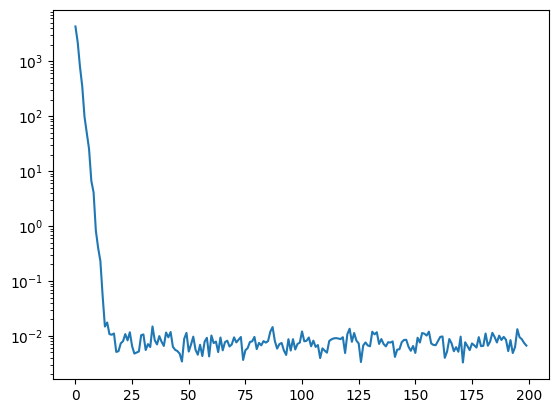

El MSE de los coeficientes es :0.0118 con un learning rate = 0.01


In [30]:
# Generar datos de regresión
X_reg, y_reg, coef_reg = make_regression(
    n_samples=10000,
    n_features=50,
    bias=0.25,
    noise=0.1,
    shuffle=True,
    coef=True,
    random_state=0)

max_iters = 200

# función auxiliar para crear un gif y ver la convergencia de los parámetros
def get_fig(idx):
  fig, ax = plt.subplots(dpi=150)
  ax.set_xlabel(r"$\beta_1,\dots \beta_{50}$")
  ax.set_ylabel(r"Error: beta estimado - beta real")
  ax.plot(model_sgd.beta_updates[idx] - coef_reg, 'o')
  ax.grid()
  ax.set_ylim(-10, 10)
  fig.suptitle(f'Iteración: {idx + 1}')
  return fig

lr = [0.01, 0.001, 0.02]

# Entrenar el modelo y reportar el error cuadrático medio para cada tasa de aprendizaje
model_sgd = SGD_LR(learning_rate=lr[0], max_iters=max_iters)
model_sgd.fit(X_reg, y_reg)
plt.plot(model_sgd.loss_history)
plt.yscale("log")
plt.show()
mse = ((model_sgd.coefficients_ - coef_reg) ** 2).sum()
print(f'El MSE de los coeficientes es :{mse:4.4f} con un learning rate = {lr[0]}')
df = pd.DataFrame(model_sgd.beta_updates)
df["combine"] = df.values.tolist()
df = df.reset_index()
df = df[["index", "combine"]].copy()
df["coefs"] = [coef_reg] * max_iters
df.rename(columns={'index':'Iteración'}, inplace=True)
df["Diferencia entre coeficientes estimados y reales"] = df["combine"] - df["coefs"]
df = df.explode("Diferencia entre coeficientes estimados y reales")
df["Coeficiente número"] = [i+1 for i in range(50)] * max_iters
px.scatter(df, x = "Coeficiente número", y="Diferencia entre coeficientes estimados y reales", animation_frame="Iteración")

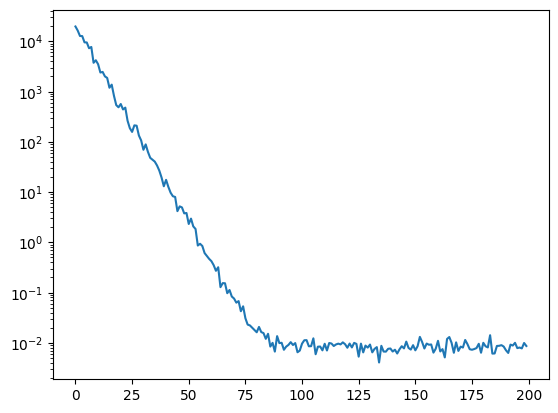

El MSE de los coeficientes es :0.0007 con un learning rate = 0.001


In [31]:
# Entrenar el modelo y reportar el error cuadrático medio para cada tasa de aprendizaje
model_sgd = SGD_LR(learning_rate=lr[1], max_iters=max_iters)
model_sgd.fit(X_reg, y_reg)
plt.plot(model_sgd.loss_history)
plt.yscale("log")
plt.show()
mse = ((model_sgd.coefficients_ - coef_reg) ** 2).sum()
print(f'El MSE de los coeficientes es :{mse:4.4f} con un learning rate = {lr[1]}')
df = pd.DataFrame(model_sgd.beta_updates)
df["combine"] = df.values.tolist()
df = df.reset_index()
df = df[["index", "combine"]].copy()
df["coefs"] = [coef_reg] * max_iters
df.rename(columns={'index':'Iteración'}, inplace=True)
df["Diferencia entre coeficientes estimados y reales"] = df["combine"] - df["coefs"]
df = df.explode("Diferencia entre coeficientes estimados y reales")
df["Coeficiente número"] = [i+1 for i in range(50)] * max_iters
px.scatter(df, x = "Coeficiente número", y="Diferencia entre coeficientes estimados y reales", animation_frame="Iteración")

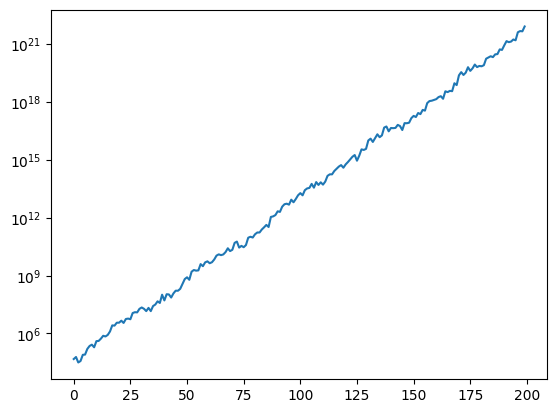

El MSE de los coeficientes es :8007594699287859036160.0000 con un learning rate = 0.02


In [32]:
# Entrenar el modelo y reportar el error cuadrático medio para cada tasa de aprendizaje
model_sgd = SGD_LR(learning_rate=lr[2], max_iters=max_iters)
model_sgd.fit(X_reg, y_reg)
plt.plot(model_sgd.loss_history)
plt.yscale("log")
plt.show()
mse = ((model_sgd.coefficients_ - coef_reg) ** 2).sum()
print(f'El MSE de los coeficientes es :{mse:4.4f} con un learning rate = {lr[2]}')
df = pd.DataFrame(model_sgd.beta_updates)
df["combine"] = df.values.tolist()
df = df.reset_index()
df = df[["index", "combine"]].copy()
df["coefs"] = [coef_reg] * max_iters
df.rename(columns={'index':'Iteración'}, inplace=True)
df["Diferencia entre coeficientes estimados y reales"] = df["combine"] - df["coefs"]
df = df.explode("Diferencia entre coeficientes estimados y reales")
df["Coeficiente número"] = [i+1 for i in range(50)] * max_iters
px.scatter(df, x = "Coeficiente número", y="Diferencia entre coeficientes estimados y reales", animation_frame="Iteración")

Podemos dividir el análisis en tres partes.

1. Las curvas en azul que se observan en las tres gráficas corresponden al error de estimación, cuando se comienzan a ajustar los parámetros de la regresión lineal por gradiente estocástico, en los dos primeros casos, con una tasa de aprendizaje de 0.1 y 0.001, al principio el error es muy grande entre los datos que predice la regresión lineal y los datos _reales_ de y, porque no han sido ajustados ni el intercepto ni los coeficientes. Conforme las iteraciones avanzan y los coeficientes son ajustados por el gradiente estocástico, el error disminuye, traduciéndose en que el modelo de regresión lineal está siendo ajustado y cada vez predice con mayor precisión a la variable $y$.

  Es importante notar que en ambos casos, tanto para una tasa de aprendizaje de 0.001 y 0.01 hay un punto, donde apesar de seguir con las iteraciones, el error ya no disminuye más y solamente oscila en el orden de $10^{-2}$. Cuando esto ocurre es cuando decimos que el modelo ha convergido y no necesita seguir iterándose. Es importante notar que la convergencia es más lenta cuando la tasa de aprendizaje es más pequeña, pues notemos que cuando la tasa es de 0.01 los coeficientes del modelo convergen en la 25a iteración (aproximadamente) y cuando la tasa es más pequeña (de 0.001) los coeficientes convergen más lentamente hasta después de la iteración 75a. Esto refleja cómo afecta la tasa de aprendizaje a la velocidad de convergencia, y tasas más pequeñas pueden necesitar mayores iteraciones.

2. Otro punto a tomar en cuenta es el MSE de los coeficientes, pues el error es más pequeño cuando la tasa de aprendizaje es más pequeña. Cuando la tasa es de 0.001 el MSE es de 0.0005 mientras que cuando la tasa es más grande de 0.01 el MSE crece a 0.0136.

  Con esta información, vemos que la tasa de aprendizaje es un parámetro muy sensible que provoca que el modelo se ajuste más rápida o lentamente a los parámetros, pero también somos capaces de mejorar la precisión con la que se ajustan los parámetros del modelo. Una elección adecuada de la tasa de aprendizaje llevará a un mejor modelo, con parámetros ajustados de manera precisa y sin caer en un aprendizaje lento o muy costoso computacionalmente (al tener o querer aumentar mucho el número de iteraciones)

Hasta este punto, todo este análisis no solo puede verse en las curvas azules con el error calculado, también pueden verse en los gráficos interactivos donde se grafiaron horizontalmente los errores (diferencias) entre cada uno de los 50 coeficientes que involucra la regresión lineal y los coeficientes estimados por el método del gradiente estocástico. En la gráfica podemos observar desplazando el slider como conforme las iteraciones incrementan, las diferencias que hay entre los coeficientes estimados y los reales son cada vez más pequeñas y tienden a cero.

3. Por último, debemos notar que para el caso especial de tasa de 0.02, el algoritmo del gradiente estocástico divergió, pues en todo momento el error creció y creció sin ajustarse el modelo y haciendo cada vez predicciones con un mayor margen de error. Esto refleja otra parte de la tasa de aprendizaje, que puede llevar a un modelo completamente errado e inservible. De hecho si intentamos ajustar el modelo con una tasa más grande como la de 0.1 que se pide en la tarea, los errores calculados son tan grandes que exceden el espacio de memoria que les da python como número flotantes, que podemos ver en el siguiente código

In [33]:
model_sgd = SGD_LR(learning_rate=0.1, max_iters=max_iters)
model_sgd.fit(X_reg, y_reg)

<ipython-input-29-cf61506e6033>:63: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning:

overflow encountered in reduce

<ipython-input-29-cf61506e6033>:57: RuntimeWarning:

overflow encountered in multiply

<ipython-input-29-cf61506e6033>:60: RuntimeWarning:

invalid value encountered in subtract

